In [1]:
from  google.colab import files

uploaded = files.upload()

Saving Cofield.1.jpg to Cofield.1 (4).jpg
Saving Cofield.2.jpg to Cofield.2 (4).jpg
Saving Cofield.3.jpg to Cofield.3 (4).jpg
Saving Cofield.4.jpg to Cofield.4 (4).jpg
Saving Cofield.5.jpg to Cofield.5 (4).jpg
Saving Cofield.6.jpg to Cofield.6 (4).jpg
Saving Cofield.7.jpg to Cofield.7 (4).jpg
Saving Cofield.8.jpg to Cofield.8 (4).jpg
Saving Cofield.9.jpg to Cofield.9 (4).jpg
Saving Cofield.10.jpg to Cofield.10 (4).jpg
Saving Cofield.11.jpg to Cofield.11 (4).jpg
Saving Cofield.12.jpg to Cofield.12 (4).jpg
Saving Cofield.13.jpg to Cofield.13 (4).jpg
Saving Cofield.14.jpg to Cofield.14 (4).jpg
Saving Cofield.15.jpg to Cofield.15 (4).jpg
Saving Cofield.16.jpg to Cofield.16 (4).jpg
Saving Cofield.17.jpg to Cofield.17 (4).jpg
Saving Cofield.18.jpg to Cofield.18 (4).jpg
Saving Cofield.19.jpg to Cofield.19 (4).jpg
Saving Cofield.20.jpg to Cofield.20 (4).jpg
Saving Cofield.21.jpg to Cofield.21 (4).jpg
Saving Cofield.22.jpg to Cofield.22 (4).jpg
Saving Cofield.23.jpg to Cofield.23 (4).jpg
Saving

In [2]:
!pip3 install keras-tuner
from matplotlib import pyplot as pyplot
import tensorflow as tf
from tensorflow import keras
import keras_tuner as kt

In [3]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, KFold, train_test_split, ParameterGrid, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
import seaborn as sns
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [4]:
images = []
data = []
target = []

labels = {'Cofield':0, 'Depuy':1, 'Tornier':2, 'Zimmer':3}

for filename in uploaded.keys():
    class_name = filename.split('.')[0]
    label = labels.get(class_name)

    image = Image.open(filename)
    image = image.resize((250,250))
    image = image.convert('L')
    image = np.array(image)
    image_reshape = image.reshape(-1)

    images.append(image)
    data.append(image_reshape)
    target.append(label)

images = np.array(images)
target = np.array(target)
data = np.array(data)

NameError: name 'uploaded' is not defined

In [ ]:
images[0].size

62500

In [ ]:
target.shape

(597,)

In [ ]:
target[0]

'Cofield'

In [ ]:
data.shape

(597, 62500)

<Figure size 640x480 with 0 Axes>

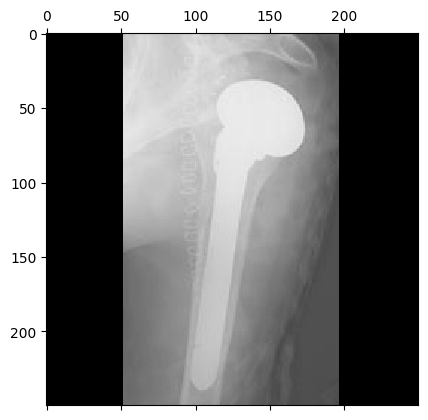

In [ ]:
plt.gray()
plt.matshow(images[12])
plt.show()

In [ ]:
X = data.copy()
y = target.copy()

In [ ]:
y = tf.keras.utils.to_categorical(y)

In [ ]:
y = tf.keras.utils.to_categorical(y)

In [ ]:
y[500]

array([0., 0., 0., 1.], dtype=float32)

# Trial 1: All data with MLP

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, shuffle=True, random_state=1)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
scaler = MinMaxScaler()
X_train_scaled2 = scaler.fit_transform(X_train)
X_test_scaled2 = scaler.transform(X_test)

In [ ]:
X_train_scaled3 = X_train.astype('float32')
X_test_scaled3 = X_test.astype('float32')

X_train_scaled3 = X_train_scaled3/255.0
X_test_scaled3 = X_test_scaled3/255.0

### Testing SGD

In [ ]:
kf = KFold(n_splits=10, shuffle=True, random_state=1)
mlp = MLPClassifier(solver='sgd', max_iter=500)
i = 0
for train_indices, test_indices in kf.split(X_train_scaled):
    i += 1
    mlp.fit(X_train_scaled[train_indices], y_train[train_indices])
    print("ith %s, test score: %s" % (i, mlp.score(X_train_scaled[test_indices], y_train[test_indices])))

ith 1, test score: 0.4523809523809524
ith 2, test score: 0.40476190476190477
ith 3, test score: 0.42857142857142855
ith 4, test score: 0.42857142857142855
ith 5, test score: 0.2619047619047619
ith 6, test score: 0.38095238095238093
ith 7, test score: 0.42857142857142855
ith 8, test score: 0.34146341463414637
ith 9, test score: 0.36585365853658536
ith 10, test score: 0.43902439024390244


In [ ]:
print(classification_report(y_test.argmax(axis=1), mlp.predict(X_test_scaled).argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.26      0.38      0.31        32
           1       0.53      0.66      0.59        80
           2       0.00      0.00      0.00        21
           3       0.35      0.23      0.28        47

    accuracy                           0.42       180
   macro avg       0.29      0.32      0.29       180
weighted avg       0.37      0.42      0.39       180



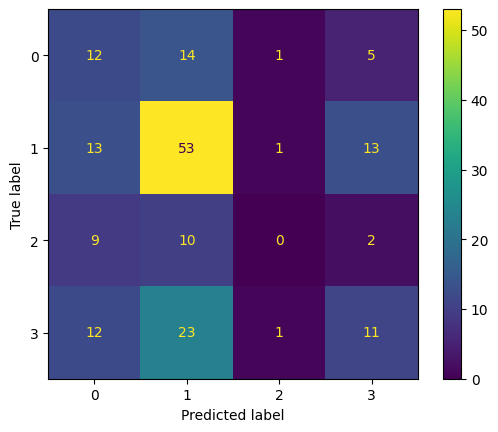

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test.argmax(axis=1), mlp.predict(X_test_scaled).argmax(axis=1))

In [ ]:
kf = KFold(n_splits=10, shuffle=True, random_state=1)
mlp = MLPClassifier(solver='sgd', max_iter=500)
i = 0
for train_indices, test_indices in kf.split(X_train_scaled2):
    i += 1
    mlp.fit(X_train_scaled2[train_indices], y_train[train_indices])
    print("ith %s, test score: %s" % (i, mlp.score(X_train_scaled2[test_indices], y_train[test_indices])))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


ith 1, test score: 0.5
ith 2, test score: 0.38095238095238093


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


ith 3, test score: 0.2857142857142857


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


ith 4, test score: 0.3333333333333333


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


ith 5, test score: 0.2857142857142857
ith 6, test score: 0.40476190476190477
ith 7, test score: 0.42857142857142855


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


ith 8, test score: 0.3170731707317073


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


ith 9, test score: 0.36585365853658536
ith 10, test score: 0.36585365853658536


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
print(classification_report(y_test.argmax(axis=1), mlp.predict(X_test_scaled2).argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.30      0.53      0.38        32
           1       0.54      0.60      0.57        80
           2       0.00      0.00      0.00        21
           3       0.41      0.30      0.35        47

    accuracy                           0.44       180
   macro avg       0.31      0.36      0.32       180
weighted avg       0.40      0.44      0.41       180



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


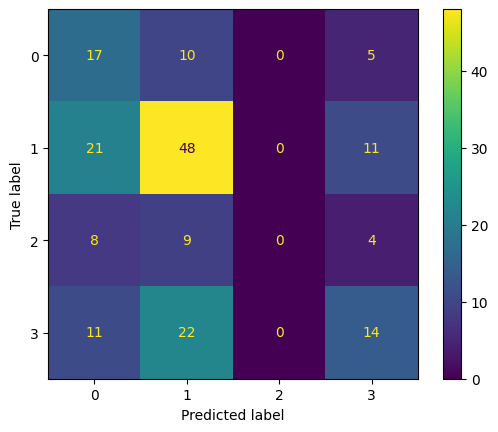

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test.argmax(axis=1), mlp.predict(X_test_scaled2).argmax(axis=1))

In [ ]:
kf = KFold(n_splits=10, shuffle=True, random_state=1)
mlp = MLPClassifier(solver='sgd', max_iter=500)
i = 0
for train_indices, test_indices in kf.split(X_train_scaled3):
    i += 1
    mlp.fit(X_train_scaled3[train_indices], y_train[train_indices])
    print("ith %s, test score: %s" % (i, mlp.score(X_train_scaled3[test_indices], y_train[test_indices])))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


ith 1, test score: 0.42857142857142855
ith 2, test score: 0.4523809523809524


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


ith 3, test score: 0.30952380952380953


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


ith 4, test score: 0.30952380952380953


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


ith 5, test score: 0.2619047619047619
ith 6, test score: 0.38095238095238093


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


ith 7, test score: 0.4523809523809524


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


ith 8, test score: 0.3170731707317073
ith 9, test score: 0.36585365853658536
ith 10, test score: 0.36585365853658536


In [ ]:
print(classification_report(y_test.argmax(axis=1), mlp.predict(X_test_scaled3).argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.24      0.53      0.33        32
           1       0.53      0.51      0.52        80
           2       0.00      0.00      0.00        21
           3       0.39      0.26      0.31        47

    accuracy                           0.39       180
   macro avg       0.29      0.32      0.29       180
weighted avg       0.38      0.39      0.37       180



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


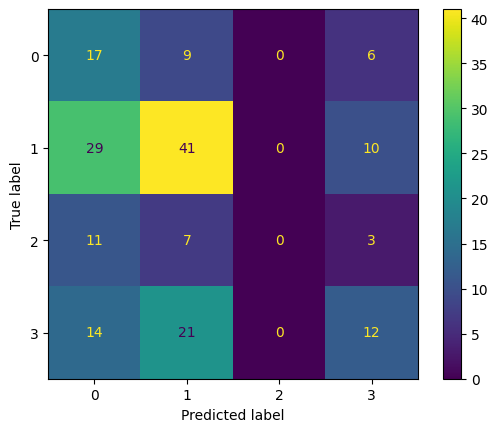

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test.argmax(axis=1), mlp.predict(X_test_scaled3).argmax(axis=1))

### Testing with Adam

In [ ]:
kf = KFold(n_splits=10, shuffle=True, random_state=1)
mlp = MLPClassifier(solver='adam', learning_rate='adaptive',max_iter=500)
i = 0
for train_indices, test_indices in kf.split(X_train_scaled):
    i += 1
    mlp.fit(X_train_scaled[train_indices], y_train[train_indices])
    print("ith %s, test score: %s" % (i, mlp.score(X_train_scaled[test_indices], y_train[test_indices])))

ith 1, test score: 0.35714285714285715
ith 2, test score: 0.38095238095238093
ith 3, test score: 0.2857142857142857
ith 4, test score: 0.2619047619047619
ith 5, test score: 0.21428571428571427
ith 6, test score: 0.35714285714285715
ith 7, test score: 0.38095238095238093
ith 8, test score: 0.34146341463414637
ith 9, test score: 0.3170731707317073
ith 10, test score: 0.34146341463414637


In [ ]:
print(classification_report(y_test.argmax(axis=1), mlp.predict(X_test_scaled).argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.29      0.38      0.32        32
           1       0.47      0.59      0.53        80
           2       0.00      0.00      0.00        21
           3       0.38      0.26      0.30        47

    accuracy                           0.39       180
   macro avg       0.28      0.30      0.29       180
weighted avg       0.36      0.39      0.37       180



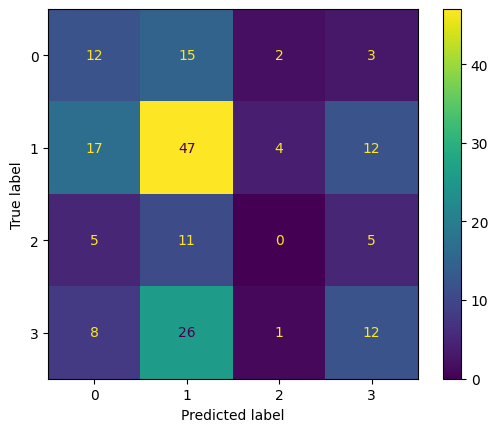

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test.argmax(axis=1), mlp.predict(X_test_scaled).argmax(axis=1))

In [ ]:
kf = KFold(n_splits=10, shuffle=True, random_state=1)
mlp = MLPClassifier(solver='adam', learning_rate='adaptive',max_iter=500)
i = 0
for train_indices, test_indices in kf.split(X_train_scaled3):
    i += 1
    mlp.fit(X_train_scaled3[train_indices], y_train[train_indices])
    print("ith %s, test score: %s" % (i, mlp.score(X_train_scaled3[test_indices], y_train[test_indices])))

ith 1, test score: 0.38095238095238093
ith 2, test score: 0.38095238095238093
ith 3, test score: 0.30952380952380953


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


ith 4, test score: 0.21428571428571427
ith 5, test score: 0.2619047619047619
ith 6, test score: 0.42857142857142855
ith 7, test score: 0.30952380952380953


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


ith 8, test score: 0.3170731707317073
ith 9, test score: 0.1951219512195122
ith 10, test score: 0.3170731707317073


In [ ]:
print(classification_report(y_test.argmax(axis=1), mlp.predict(X_test_scaled3).argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.33      0.28      0.31        32
           1       0.46      0.79      0.58        80
           2       0.00      0.00      0.00        21
           3       0.47      0.15      0.23        47

    accuracy                           0.44       180
   macro avg       0.31      0.30      0.28       180
weighted avg       0.39      0.44      0.37       180



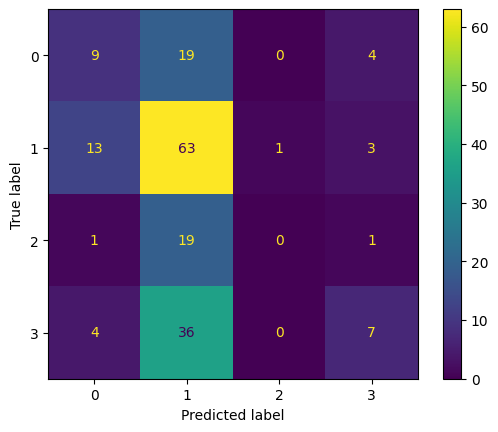

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test.argmax(axis=1), mlp.predict(X_test_scaled3).argmax(axis=1))

# Trial 2: Reduce top 2 to 150 (with MLP)

In [ ]:
images = []
data = []
target = []

labels = {'Cofield':0, 'Depuy':1, 'Tornier':2, 'Zimmer':3}

for filename in uploaded.keys():
    class_name = filename.split('.')[0]
    label = labels.get(class_name)

    if(target.count('Depuy')<150):
        image = Image.open(filename)
        image = image.resize((250,250))
        image = image.convert('L')
        image = np.array(image)
        image_reshape = image.reshape(-1)
        images.append(image)
        data.append(image_reshape)
        target.append(label)
    elif((target.count('Zimmer')<150) & (class_name != 'Depuy')):
        image = Image.open(filename)
        image = image.resize((250,250))
        image = image.convert('L')
        image = np.array(image)
        image_reshape = image.reshape(-1)
        images.append(image)
        data.append(image_reshape)
        target.append(label)

images = np.array(images)
target = np.array(target)
data = np.array(data)

In [ ]:
data.shape

(453, 62500)

In [ ]:
X = data.copy()
y = target.copy()

y = tf.keras.utils.to_categorical(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, shuffle=True, random_state=1)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled2 = X_train.astype('float32')
X_test_scaled2 = X_test.astype('float32')

X_train_scaled2 = X_train_scaled2/255.0
X_test_scaled2 = X_test_scaled2/255.0

### Testing SGD

In [ ]:
kf = KFold(n_splits=10, shuffle=True, random_state=1)
mlp = MLPClassifier(solver='sgd', max_iter=500)
i = 0
for train_indices, test_indices in kf.split(X_train_scaled):
    i += 1
    mlp.fit(X_train_scaled[train_indices], y_train[train_indices])
    print("ith %s, test score: %s" % (i, mlp.score(X_train_scaled[test_indices], y_train[test_indices])))

ith 1, test score: 0.35714285714285715
ith 2, test score: 0.40476190476190477
ith 3, test score: 0.35714285714285715
ith 4, test score: 0.42857142857142855
ith 5, test score: 0.23809523809523808
ith 6, test score: 0.40476190476190477
ith 7, test score: 0.40476190476190477
ith 8, test score: 0.3902439024390244
ith 9, test score: 0.36585365853658536
ith 10, test score: 0.4146341463414634


In [ ]:
print(classification_report(y_test.argmax(axis=1), mlp.predict(X_test_scaled).argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.30      0.44      0.35        32
           1       0.50      0.65      0.57        80
           2       0.00      0.00      0.00        21
           3       0.44      0.26      0.32        47

    accuracy                           0.43       180
   macro avg       0.31      0.34      0.31       180
weighted avg       0.39      0.43      0.40       180



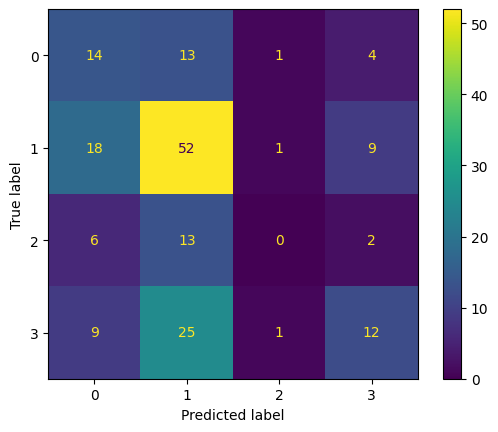

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test.argmax(axis=1), mlp.predict(X_test_scaled).argmax(axis=1))

In [ ]:
kf = KFold(n_splits=10, shuffle=True, random_state=1)
mlp = MLPClassifier(solver='sgd', max_iter=500)
i = 0
for train_indices, test_indices in kf.split(X_train_scaled2):
    i += 1
    mlp.fit(X_train_scaled2[train_indices], y_train[train_indices])
    print("ith %s, test score: %s" % (i, mlp.score(X_train_scaled2[test_indices], y_train[test_indices])))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


ith 1, test score: 0.42857142857142855
ith 2, test score: 0.4523809523809524


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


ith 3, test score: 0.38095238095238093


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


ith 4, test score: 0.3333333333333333


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


ith 5, test score: 0.30952380952380953


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


ith 6, test score: 0.35714285714285715


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


ith 7, test score: 0.5238095238095238


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


ith 8, test score: 0.2926829268292683


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


ith 9, test score: 0.3170731707317073
ith 10, test score: 0.36585365853658536


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
print(classification_report(y_test.argmax(axis=1), mlp.predict(X_test_scaled2).argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.28      0.41      0.33        32
           1       0.53      0.68      0.59        80
           2       0.00      0.00      0.00        21
           3       0.35      0.23      0.28        47

    accuracy                           0.43       180
   macro avg       0.29      0.33      0.30       180
weighted avg       0.38      0.43      0.40       180



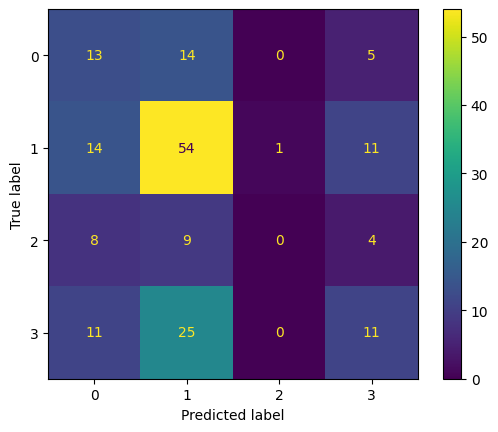

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test.argmax(axis=1), mlp.predict(X_test_scaled2).argmax(axis=1))

### Testing with Adam

In [ ]:
kf = KFold(n_splits=10, shuffle=True, random_state=1)
mlp = MLPClassifier(solver='adam', learning_rate='adaptive',max_iter=500)
i = 0
for train_indices, test_indices in kf.split(X_train_scaled):
    i += 1
    mlp.fit(X_train_scaled[train_indices], y_train[train_indices])
    print("ith %s, test score: %s" % (i, mlp.score(X_train_scaled[test_indices], y_train[test_indices])))

ith 1, test score: 0.38095238095238093
ith 2, test score: 0.42857142857142855
ith 3, test score: 0.2619047619047619
ith 4, test score: 0.2857142857142857
ith 5, test score: 0.21428571428571427
ith 6, test score: 0.35714285714285715
ith 7, test score: 0.38095238095238093
ith 8, test score: 0.3902439024390244
ith 9, test score: 0.2682926829268293
ith 10, test score: 0.2682926829268293


In [ ]:
print(classification_report(y_test.argmax(axis=1), mlp.predict(X_test_scaled).argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.31      0.47      0.37        32
           1       0.50      0.57      0.53        80
           2       0.20      0.05      0.08        21
           3       0.35      0.26      0.30        47

    accuracy                           0.41       180
   macro avg       0.34      0.34      0.32       180
weighted avg       0.39      0.41      0.39       180



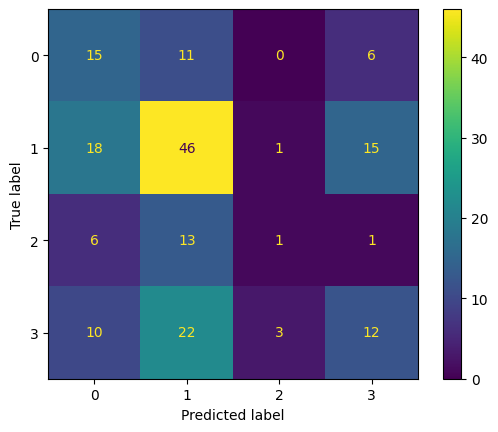

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test.argmax(axis=1), mlp.predict(X_test_scaled).argmax(axis=1))

In [ ]:
kf = KFold(n_splits=10, shuffle=True, random_state=1)
mlp = MLPClassifier(solver='adam', learning_rate='adaptive',max_iter=500)
i = 0
for train_indices, test_indices in kf.split(X_train_scaled2):
    i += 1
    mlp.fit(X_train_scaled2[train_indices], y_train[train_indices])
    print("ith %s, test score: %s" % (i, mlp.score(X_train_scaled2[test_indices], y_train[test_indices])))

ith 1, test score: 0.40476190476190477
ith 2, test score: 0.42857142857142855
ith 3, test score: 0.35714285714285715
ith 4, test score: 0.2857142857142857


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


ith 5, test score: 0.30952380952380953
ith 6, test score: 0.30952380952380953
ith 7, test score: 0.35714285714285715
ith 8, test score: 0.24390243902439024
ith 9, test score: 0.21951219512195122
ith 10, test score: 0.21951219512195122


In [ ]:
print(classification_report(y_test.argmax(axis=1), mlp.predict(X_test_scaled2).argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.21      0.59      0.31        32
           1       0.52      0.41      0.46        80
           2       0.00      0.00      0.00        21
           3       0.43      0.21      0.29        47

    accuracy                           0.34       180
   macro avg       0.29      0.30      0.27       180
weighted avg       0.38      0.34      0.34       180



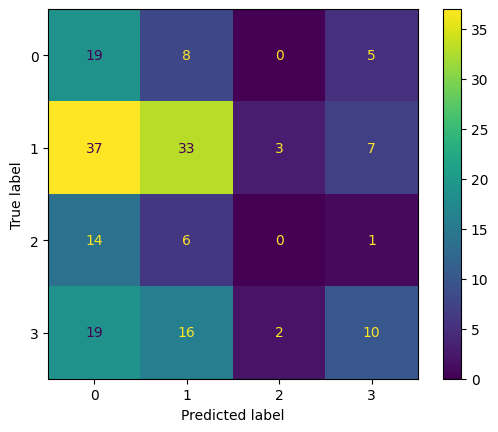

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test.argmax(axis=1), mlp.predict(X_test_scaled2).argmax(axis=1))

# Trial 3: Reduce top 2 to 100 (with MLP)

In [ ]:
images = []
data = []
target = []

labels = {'Cofield':0, 'Depuy':1, 'Tornier':2, 'Zimmer':3}

for filename in uploaded.keys():
    class_name = filename.split('.')[0]
    label = labels.get(class_name)

    if(target.count('Depuy')<100):
        image = Image.open(filename)
        image = image.resize((250,250))
        image = image.convert('L')
        image = np.array(image)
        image_reshape = image.reshape(-1)
        images.append(image)
        data.append(image_reshape)
        target.append(label)
    elif((target.count('Zimmer')<100) & (class_name != 'Depuy')):
        image = Image.open(filename)
        image = image.resize((250,250))
        image = image.convert('L')
        image = np.array(image)
        image_reshape = image.reshape(-1)
        images.append(image)
        data.append(image_reshape)
        target.append(label)

images = np.array(images)
target = np.array(target)
data = np.array(data)

In [ ]:
X = data.copy()
y = target.copy()

y = tf.keras.utils.to_categorical(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, shuffle=True, random_state=1)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled2 = X_train.astype('float32')
X_test_scaled2 = X_test.astype('float32')

X_train_scaled2 = X_train_scaled2/255.0
X_test_scaled2 = X_test_scaled2/255.0

### Testing SGD

In [ ]:
kf = KFold(n_splits=10, shuffle=True, random_state=1)
mlp = MLPClassifier(solver='sgd', max_iter=500)
i = 0
for train_indices, test_indices in kf.split(X_train_scaled):
    i += 1
    mlp.fit(X_train_scaled[train_indices], y_train[train_indices])
    print("ith %s, test score: %s" % (i, mlp.score(X_train_scaled[test_indices], y_train[test_indices])))

ith 1, test score: 0.3333333333333333
ith 2, test score: 0.47619047619047616
ith 3, test score: 0.38095238095238093
ith 4, test score: 0.42857142857142855
ith 5, test score: 0.2619047619047619
ith 6, test score: 0.2857142857142857
ith 7, test score: 0.47619047619047616
ith 8, test score: 0.36585365853658536
ith 9, test score: 0.4146341463414634
ith 10, test score: 0.4146341463414634


In [ ]:
print(classification_report(y_test.argmax(axis=1), mlp.predict(X_test_scaled).argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.29      0.44      0.35        32
           1       0.52      0.62      0.57        80
           2       0.00      0.00      0.00        21
           3       0.44      0.30      0.35        47

    accuracy                           0.43       180
   macro avg       0.31      0.34      0.32       180
weighted avg       0.40      0.43      0.41       180



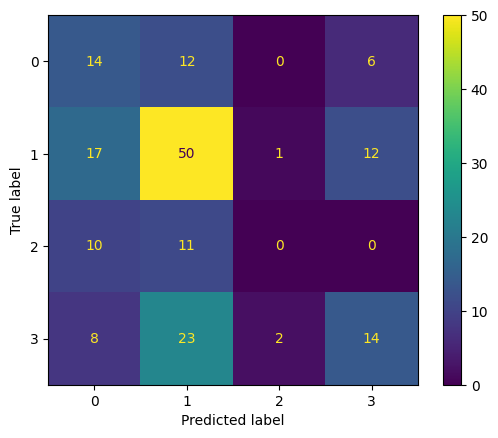

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test.argmax(axis=1), mlp.predict(X_test_scaled).argmax(axis=1))

In [ ]:
kf = KFold(n_splits=10, shuffle=True, random_state=1)
mlp = MLPClassifier(solver='adam', learning_rate='adaptive',max_iter=500)
i = 0
for train_indices, test_indices in kf.split(X_train_scaled2):
    i += 1
    mlp.fit(X_train_scaled2[train_indices], y_train[train_indices])
    print("ith %s, test score: %s" % (i, mlp.score(X_train_scaled2[test_indices], y_train[test_indices])))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


ith 1, test score: 0.38095238095238093


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


ith 2, test score: 0.6190476190476191
ith 3, test score: 0.30952380952380953
ith 4, test score: 0.2619047619047619
ith 5, test score: 0.19047619047619047
ith 6, test score: 0.40476190476190477


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


ith 7, test score: 0.35714285714285715
ith 8, test score: 0.1951219512195122
ith 9, test score: 0.34146341463414637
ith 10, test score: 0.3170731707317073


In [ ]:
print(classification_report(y_test.argmax(axis=1), mlp.predict(X_test_scaled2).argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.21      0.44      0.29        32
           1       0.53      0.53      0.53        80
           2       0.00      0.00      0.00        21
           3       0.38      0.26      0.30        47

    accuracy                           0.38       180
   macro avg       0.28      0.30      0.28       180
weighted avg       0.37      0.38      0.36       180



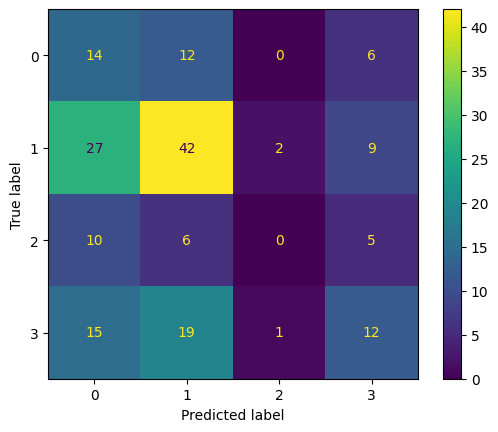

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test.argmax(axis=1), mlp.predict(X_test_scaled2).argmax(axis=1))

### Testing Adam

In [ ]:
kf = KFold(n_splits=10, shuffle=True, random_state=1)
mlp = MLPClassifier(solver='adam', learning_rate='adaptive',max_iter=500)
i = 0
for train_indices, test_indices in kf.split(X_train_scaled):
    i += 1
    mlp.fit(X_train_scaled[train_indices], y_train[train_indices])
    print("ith %s, test score: %s" % (i, mlp.score(X_train_scaled[test_indices], y_train[test_indices])))

ith 1, test score: 0.2857142857142857
ith 2, test score: 0.42857142857142855
ith 3, test score: 0.40476190476190477
ith 4, test score: 0.35714285714285715
ith 5, test score: 0.14285714285714285
ith 6, test score: 0.30952380952380953
ith 7, test score: 0.4523809523809524
ith 8, test score: 0.3170731707317073
ith 9, test score: 0.2682926829268293
ith 10, test score: 0.3902439024390244


In [ ]:
print(classification_report(y_test.argmax(axis=1), mlp.predict(X_test_scaled).argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.27      0.31      0.29        32
           1       0.52      0.70      0.60        80
           2       0.25      0.10      0.14        21
           3       0.48      0.28      0.35        47

    accuracy                           0.45       180
   macro avg       0.38      0.35      0.34       180
weighted avg       0.43      0.45      0.42       180



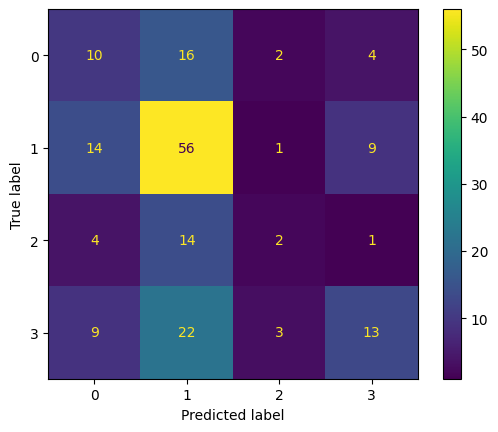

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test.argmax(axis=1), mlp.predict(X_test_scaled).argmax(axis=1))

In [ ]:
kf = KFold(n_splits=10, shuffle=True, random_state=1)
mlp = MLPClassifier(solver='adam', learning_rate='adaptive',max_iter=500)
i = 0
for train_indices, test_indices in kf.split(X_train_scaled2):
    i += 1
    mlp.fit(X_train_scaled2[train_indices], y_train[train_indices])
    print("ith %s, test score: %s" % (i, mlp.score(X_train_scaled2[test_indices], y_train[test_indices])))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


ith 1, test score: 0.38095238095238093
ith 2, test score: 0.42857142857142855
ith 3, test score: 0.4523809523809524
ith 4, test score: 0.23809523809523808
ith 5, test score: 0.3333333333333333
ith 6, test score: 0.40476190476190477


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


ith 7, test score: 0.35714285714285715
ith 8, test score: 0.3902439024390244


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


ith 9, test score: 0.21951219512195122
ith 10, test score: 0.24390243902439024


In [ ]:
print(classification_report(y_test.argmax(axis=1), mlp.predict(X_test_scaled2).argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.21      0.59      0.31        32
           1       0.49      0.31      0.38        80
           2       0.33      0.05      0.08        21
           3       0.37      0.28      0.32        47

    accuracy                           0.32       180
   macro avg       0.35      0.31      0.27       180
weighted avg       0.39      0.32      0.32       180



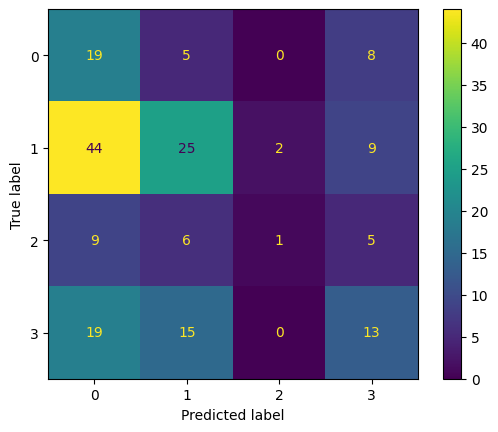

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test.argmax(axis=1), mlp.predict(X_test_scaled2).argmax(axis=1))

# Trial 4: All data CNN

In [6]:
images = []
data = []
target = []

labels = {'Cofield':0, 'Depuy':1, 'Tornier':2, 'Zimmer':3}

for filename in uploaded.keys():
    class_name = filename.split('.')[0]
    label = labels.get(class_name)

    image = Image.open(filename)
    image = image.resize((250,250))
    image = image.convert('L')
    image = np.array(image)

    images.append(image)
    target.append(label)

images = np.array(images)
target = np.array(target)

In [7]:
X = images.copy()
y = target.copy()

X = X.reshape((X.shape[0], X.shape[1], X.shape[2], 1))
y = tf.keras.utils.to_categorical(y)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, shuffle=True, random_state=1)

In [9]:
X_train_scaled2 = X_train.astype('float32')
X_test_scaled2 = X_test.astype('float32')

X_train_scaled2 = X_train_scaled2/255.0
X_test_scaled2 = X_test_scaled2/255.0

### Testing Keras Model

In [10]:
def keras_model(hyperModel):
    model = keras.Sequential()
    model.add(keras.layers.Conv2D(32, 3, activation='relu', kernel_initializer='he_uniform', input_shape=(250, 250, 1))) # Add a Conv2D layer with: 32 filters, 3 as the strides, relu activation, `he_uniform` kernel_initializer, and the input shape set to the reshape used above without the number of instances
    model.add(keras.layers.MaxPooling2D((2, 2))) # Add a MadPolling2D with (2, 2) as pool_size
    model.add(keras.layers.Flatten()) # Add a Flatten layer
    hp_units = hyperModel.Int('units', min_value = 32, max_value = 512, step = 32) # Create a `hyperModel.Int` with: 'units' as name, 32 as min_valuel, 512 as max_value, 32 as step
    model.add(keras.layers.Dense(hp_units, activation = 'relu', kernel_initializer = 'he_uniform')) # Add a Dense layer with: `hp_units` as units, 'relu' as activation, 'he_uniform' as kernel_initializer
    model.add(keras.layers.Dropout(0,2)) # Add a dropout layer with .2 as the rate
    model.add(keras.layers.Dense(4, activation = 'softmax')) # Add a Dense layer with: 4 as units, 'softmax' as activation

    hp_learning_rate = hyperModel.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4]) # Create a `hyperModel.Choice` with: 'learning_rate' as name, and [1e-2, 1e-3, 1e-4] as values
    model.compile(optimizer = keras.optimizers.Adam(learning_rate = hp_learning_rate), # optimizer set Adam with learning_rate=`hp_learning_rate`
        loss = keras.losses.CategoricalCrossentropy(), # loss set to CategoricalCrossentropy
        metrics = ['accuracy'])
    return model

In [11]:
tuner = kt.Hyperband(keras_model, objective = 'val_accuracy', max_epochs = 3, factor = 3, directory = './', project_name = 'CNN', overwrite=True ) # Create `HyperBand` object with: keras_model as model, 'val_accuracy' as objective, 5 for max_epochs, 3 as factor, directory = './', project_name= 'MNIST CNN', and overwrite = True
stop_early = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5) # Create `EarlyStopping` object with: 'val_loss' as monitor and 5 as patience

tuner.search(X_train_scaled2, y_train, epochs = 30, validation_split = .2, callbacks = [stop_early]) # Start a Tuner search passing X_train and y_train, epochs as 40, 20% validation split, and callback set to [stop_early]

best_hps = tuner.get_best_hyperparameters()[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

Trial 6 Complete [00h 01m 24s]
val_accuracy: 0.4642857015132904

Best val_accuracy So Far: 0.488095223903656
Total elapsed time: 00h 07m 53s

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 224 and the optimal learning rate for the optimizer
is 0.0001.



In [12]:
model = tuner.hypermodel.build(best_hps) # Build the hypermodel passing `best_hps`
history = model.fit(X_train_scaled2, y_train, epochs = 30, validation_split=.2) # Fit the model passing X_train, y_train, epochs as 40, and a 20% validation split

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/30
11/11 [==============================] - 53s 4s/step - loss: 14.4836 - accuracy: 0.3664 - val_loss: 8.4094 - val_accuracy: 0.4167
Epoch 2/30
11/11 [==============================] - 37s 3s/step - loss: 5.0119 - accuracy: 0.4294 - val_loss: 4.4892 - val_accuracy: 0.4524
Epoch 3/30
11/11 [==============================] - 43s 4s/step - loss: 3.2585 - accuracy: 0.4505 - val_loss: 2.2138 - val_accuracy: 0.4643
Epoch 4/30
11/11 [==============================] - 39s 4s/step - loss: 1.5540 - accuracy: 0.5315 - val_loss: 2.2034 - val_accuracy: 0.4762
Epoch 5/30
11/11 [==============================] - 37s 3s/step - loss: 1.2197 - accuracy: 0.5916 - val_loss: 2.3586 - val_accuracy: 0.5119
Epoch 6/30
11/11 [==============================] - 38s 4s/step - loss: 1.0624 - accuracy: 0.6396 - val_loss: 2.2220 - val_accuracy: 0.4286
Epoch 7/30
11/11 [==============================] - 41s 4s/step - loss: 0.8944 - accuracy: 0.6607 - val_loss: 2.0192 - val_accuracy: 0.5238
Epoch 8/30
11/11 [=

In [13]:
hyperModel = tuner.hypermodel.build(best_hps) # Build the hypermodel passing `best_hps`
hyperModel.fit(X_train_scaled2, y_train, epochs = best_epoch, validation_split=.2) # Fit the model passing X_train, y_train, epochs as `best_epoch`, and a 20% validation split

Epoch 1/7
11/11 [==============================] - 39s 3s/step - loss: 6.2100 - accuracy: 0.3994 - val_loss: 2.6951 - val_accuracy: 0.3690
Epoch 2/7
11/11 [==============================] - 40s 4s/step - loss: 1.7969 - accuracy: 0.4685 - val_loss: 2.4600 - val_accuracy: 0.3690
Epoch 3/7
11/11 [==============================] - 40s 4s/step - loss: 1.7095 - accuracy: 0.4715 - val_loss: 1.7914 - val_accuracy: 0.3810
Epoch 4/7
11/11 [==============================] - 38s 3s/step - loss: 1.1234 - accuracy: 0.5886 - val_loss: 1.9555 - val_accuracy: 0.4643
Epoch 5/7
11/11 [==============================] - 38s 3s/step - loss: 0.8681 - accuracy: 0.6697 - val_loss: 1.8478 - val_accuracy: 0.5119
Epoch 6/7
11/11 [==============================] - 40s 4s/step - loss: 0.7773 - accuracy: 0.6787 - val_loss: 1.7868 - val_accuracy: 0.4881
Epoch 7/7
11/11 [==============================] - 38s 4s/step - loss: 0.8432 - accuracy: 0.6937 - val_loss: 1.6842 - val_accuracy: 0.3810


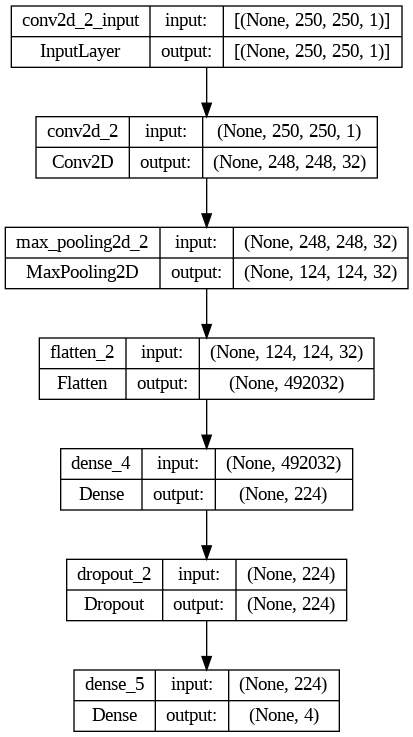

In [17]:
tf.keras.utils.plot_model(hyperModel, show_shapes=True) # Use `plot_model` found in `tf.keras.utils` namespace, pass the trained `hyperModel` and show_shape set to True

In [14]:
eval_result = hyperModel.evaluate(X_test_scaled2, y_test) # Use the evaluate function a part of the `hyperModel` object passing `X_valid` and `y_valid`
print('[test loss, test accuracy]:', eval_result)

6/6 [==============================] - 3s 500ms/step - loss: 1.7942 - accuracy: 0.3389
[test loss, test accuracy]: [1.7942230701446533, 0.33888888359069824]


In [15]:
print(classification_report(y_test.argmax(axis=1), hyperModel.predict(X_test_scaled2).argmax(axis=1))) # Generate the Classification Report using the `classification_report` function passing `y_valid` and the predictions retreived from `hyperModel.predict` both need have argmax(axis=1) applied to them.

6/6 [==============================] - 3s 501ms/step
              precision    recall  f1-score   support

           0       0.50      0.31      0.38        32
           1       0.50      0.33      0.39        80
           2       0.14      0.24      0.18        21
           3       0.27      0.43      0.33        47

    accuracy                           0.34       180
   macro avg       0.35      0.33      0.32       180
weighted avg       0.40      0.34      0.35       180



6/6 [==============================] - 3s 541ms/step


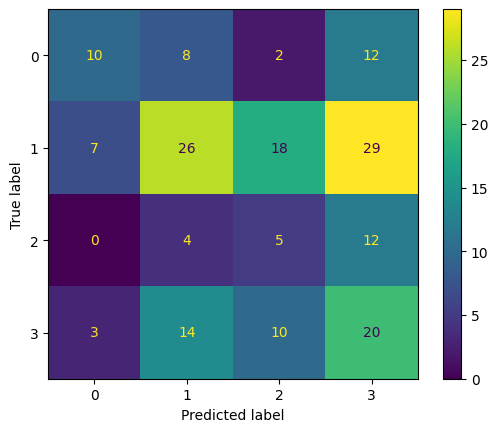

In [16]:
ConfusionMatrixDisplay.from_predictions(y_test.argmax(axis=1), hyperModel.predict(X_test_scaled2).argmax(axis=1)) # Generate the Confusion Matrix using the `ConfusionMatrixDisplay.from_predictions` passing `y_valid` and the predictions retreived from `hyperModel.predict` both need have argmax(axis=1) applied to them.

# Trial 5: Top 2 reduce to 150 (CNN)

In [5]:
images = []
data = []
target = []

labels = {'Cofield':0, 'Depuy':1, 'Tornier':2, 'Zimmer':3}

for filename in uploaded.keys():
    class_name = filename.split('.')[0]
    label = labels.get(class_name)

    if(target.count('Depuy')<150):
        image = Image.open(filename)
        image = image.resize((250,250))
        image = image.convert('L')
        image = np.array(image)
        images.append(image)
        target.append(label)
    elif((target.count('Zimmer')<150) & (class_name != 'Depuy')):
        image = Image.open(filename)
        image = image.resize((250,250))
        image = image.convert('L')
        image = np.array(image)
        images.append(image)
        target.append(label)

images = np.array(images)
target = np.array(target)

In [6]:
X = images.copy()
y = target.copy()

X = X.reshape((X.shape[0], X.shape[1], X.shape[2], 1))
y = tf.keras.utils.to_categorical(y)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, shuffle=True, random_state=1)

In [8]:
X_train_scaled2 = X_train.astype('float32')
X_test_scaled2 = X_test.astype('float32')

X_train_scaled2 = X_train_scaled2/255.0
X_test_scaled2 = X_test_scaled2/255.0

### Testing CNN

In [9]:
def keras_model(hyperModel):
    model = keras.Sequential()
    model.add(keras.layers.Conv2D(32, 3, activation='relu', kernel_initializer='he_uniform', input_shape=(250, 250, 1))) # Add a Conv2D layer with: 32 filters, 3 as the strides, relu activation, `he_uniform` kernel_initializer, and the input shape set to the reshape used above without the number of instances
    model.add(keras.layers.MaxPooling2D((2, 2))) # Add a MadPolling2D with (2, 2) as pool_size
    model.add(keras.layers.Flatten()) # Add a Flatten layer
    hp_units = hyperModel.Int('units', min_value = 32, max_value = 352, step = 32) # Create a `hyperModel.Int` with: 'units' as name, 32 as min_valuel, 512 as max_value, 32 as step
    model.add(keras.layers.Dense(hp_units, activation = 'relu', kernel_initializer = 'he_uniform')) # Add a Dense layer with: `hp_units` as units, 'relu' as activation, 'he_uniform' as kernel_initializer
    model.add(keras.layers.Dropout(0,2)) # Add a dropout layer with .2 as the rate
    model.add(keras.layers.Dense(4, activation = 'softmax')) # Add a Dense layer with: 4 as units, 'softmax' as activation

    hp_learning_rate = hyperModel.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4]) # Create a `hyperModel.Choice` with: 'learning_rate' as name, and [1e-2, 1e-3, 1e-4] as values
    model.compile(optimizer = keras.optimizers.Adam(learning_rate = hp_learning_rate), # optimizer set Adam with learning_rate=`hp_learning_rate`
        loss = keras.losses.CategoricalCrossentropy(), # loss set to CategoricalCrossentropy
        metrics = ['accuracy'])
    return model

In [10]:
tuner = kt.Hyperband(keras_model, objective = 'val_accuracy', max_epochs = 3, factor = 3, directory = './', project_name = 'CNN', overwrite=True ) # Create `HyperBand` object with: keras_model as model, 'val_accuracy' as objective, 5 for max_epochs, 3 as factor, directory = './', project_name= 'MNIST CNN', and overwrite = True
stop_early = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5) # Create `EarlyStopping` object with: 'val_loss' as monitor and 5 as patience

tuner.search(X_train_scaled2, y_train, epochs = 30, validation_split = .2, callbacks = [stop_early]) # Start a Tuner search passing X_train and y_train, epochs as 40, 20% validation split, and callback set to [stop_early]

best_hps = tuner.get_best_hyperparameters()[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

Trial 6 Complete [00h 01m 24s]
val_accuracy: 0.4404761791229248

Best val_accuracy So Far: 0.4523809552192688
Total elapsed time: 00h 08m 07s

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 128 and the optimal learning rate for the optimizer
is 0.0001.



In [11]:
model = tuner.hypermodel.build(best_hps) # Build the hypermodel passing `best_hps`
history = model.fit(X_train_scaled2, y_train, epochs = 20, validation_split=.2) # Fit the model passing X_train, y_train, epochs as 40, and a 20% validation split

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/20
11/11 [==============================] - 55s 5s/step - loss: 7.3190 - accuracy: 0.3934 - val_loss: 1.7019 - val_accuracy: 0.4524
Epoch 2/20
11/11 [==============================] - 30s 3s/step - loss: 1.2563 - accuracy: 0.4955 - val_loss: 1.3146 - val_accuracy: 0.4167
Epoch 3/20
11/11 [==============================] - 29s 3s/step - loss: 1.2872 - accuracy: 0.5075 - val_loss: 1.3123 - val_accuracy: 0.5238
Epoch 4/20
11/11 [==============================] - 28s 3s/step - loss: 1.1091 - accuracy: 0.5616 - val_loss: 1.2804 - val_accuracy: 0.4643
Epoch 5/20
11/11 [==============================] - 27s 3s/step - loss: 1.0775 - accuracy: 0.5465 - val_loss: 1.4346 - val_accuracy: 0.4643
Epoch 6/20
11/11 [==============================] - 27s 2s/step - loss: 1.1266 - accuracy: 0.5405 - val_loss: 1.2707 - val_accuracy: 0.5000
Epoch 7/20
11/11 [==============================] - 30s 3s/step - loss: 1.0258 - accuracy: 0.5916 - val_loss: 1.3109 - val_accuracy: 0.4881
Epoch 8/20
11/11 [==

In [12]:
hyperModel = tuner.hypermodel.build(best_hps) # Build the hypermodel passing `best_hps`
hyperModel.fit(X_train_scaled2, y_train, epochs = best_epoch, validation_split=.2) # Fit the model passing X_train, y_train, epochs as `best_epoch`, and a 20% validation split

Epoch 1/14
11/11 [==============================] - 32s 3s/step - loss: 11.1280 - accuracy: 0.3153 - val_loss: 4.4665 - val_accuracy: 0.4762
Epoch 2/14
11/11 [==============================] - 29s 3s/step - loss: 2.4081 - accuracy: 0.3724 - val_loss: 1.6934 - val_accuracy: 0.3810
Epoch 3/14
11/11 [==============================] - 27s 2s/step - loss: 1.4041 - accuracy: 0.4865 - val_loss: 1.4214 - val_accuracy: 0.3810
Epoch 4/14
11/11 [==============================] - 29s 3s/step - loss: 1.2627 - accuracy: 0.4505 - val_loss: 1.2737 - val_accuracy: 0.4405
Epoch 5/14
11/11 [==============================] - 29s 3s/step - loss: 1.1102 - accuracy: 0.5556 - val_loss: 1.2431 - val_accuracy: 0.4881
Epoch 6/14
11/11 [==============================] - 28s 3s/step - loss: 1.0523 - accuracy: 0.5646 - val_loss: 1.2538 - val_accuracy: 0.4881
Epoch 7/14
11/11 [==============================] - 29s 3s/step - loss: 1.0117 - accuracy: 0.5856 - val_loss: 1.4499 - val_accuracy: 0.4048
Epoch 8/14
11/11 [=

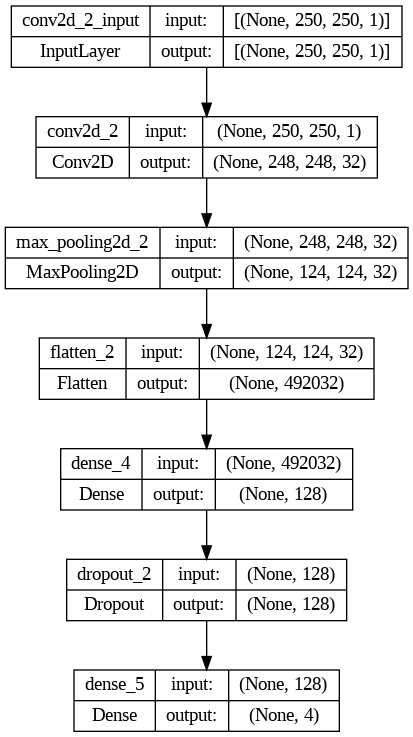

In [13]:
tf.keras.utils.plot_model(hyperModel, show_shapes=True) # Use `plot_model` found in `tf.keras.utils` namespace, pass the trained `hyperModel` and show_shape set to True

In [14]:
eval_result = hyperModel.evaluate(X_test_scaled2, y_test) # Use the evaluate function a part of the `hyperModel` object passing `X_valid` and `y_valid`
print('[test loss, test accuracy]:', eval_result)

6/6 [==============================] - 3s 428ms/step - loss: 1.4030 - accuracy: 0.3667
[test loss, test accuracy]: [1.4029629230499268, 0.36666667461395264]


In [15]:
print(classification_report(y_test.argmax(axis=1), hyperModel.predict(X_test_scaled2).argmax(axis=1))) # Generate the Classification Report using the `classification_report` function passing `y_valid` and the predictions retreived from `hyperModel.predict` both need have argmax(axis=1) applied to them.

6/6 [==============================] - 10s 2s/step
              precision    recall  f1-score   support

           0       1.00      0.06      0.12        32
           1       0.49      0.51      0.50        80
           2       0.25      0.05      0.08        21
           3       0.24      0.47      0.32        47

    accuracy                           0.37       180
   macro avg       0.50      0.27      0.25       180
weighted avg       0.49      0.37      0.34       180



6/6 [==============================] - 3s 420ms/step


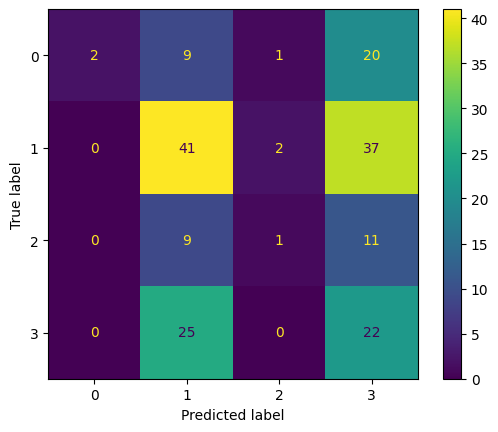

In [16]:
ConfusionMatrixDisplay.from_predictions(y_test.argmax(axis=1), hyperModel.predict(X_test_scaled2).argmax(axis=1)) # Generate the Confusion Matrix using the `ConfusionMatrixDisplay.from_predictions` passing `y_valid` and the predictions retreived from `hyperModel.predict` both need have argmax(axis=1) applied to them.

# Trial 6: Top 2 reduce to 100 (CNN)

In [4]:
images = []
data = []
target = []

labels = {'Cofield':0, 'Depuy':1, 'Tornier':2, 'Zimmer':3}

for filename in uploaded.keys():
    class_name = filename.split('.')[0]
    label = labels.get(class_name)

    if(target.count('Depuy')<100):
        image = Image.open(filename)
        image = image.resize((250,250))
        image = image.convert('L')
        image = np.array(image)
        images.append(image)
        target.append(label)
    elif((target.count('Zimmer')<100) & (class_name != 'Depuy')):
        image = Image.open(filename)
        image = image.resize((250,250))
        image = image.convert('L')
        image = np.array(image)
        images.append(image)
        target.append(label)

images = np.array(images)
target = np.array(target)

In [5]:
X = images.copy()
y = target.copy()

X = X.reshape((X.shape[0], X.shape[1], X.shape[2], 1))
y = tf.keras.utils.to_categorical(y)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, shuffle=True, random_state=1)

In [7]:
X_train_scaled2 = X_train.astype('float32')
X_test_scaled2 = X_test.astype('float32')

X_train_scaled2 = X_train_scaled2/255.0
X_test_scaled2 = X_test_scaled2/255.0

### Testing CNN

In [8]:
def keras_model(hyperModel):
    model = keras.Sequential()
    model.add(keras.layers.Conv2D(32, 3, activation='relu', kernel_initializer='he_uniform', input_shape=(250, 250, 1))) # Add a Conv2D layer with: 32 filters, 3 as the strides, relu activation, `he_uniform` kernel_initializer, and the input shape set to the reshape used above without the number of instances
    model.add(keras.layers.MaxPooling2D((2, 2))) # Add a MadPolling2D with (2, 2) as pool_size
    model.add(keras.layers.Flatten()) # Add a Flatten layer
    hp_units = hyperModel.Int('units', min_value = 32, max_value = 352, step = 32) # Create a `hyperModel.Int` with: 'units' as name, 32 as min_valuel, 512 as max_value, 32 as step
    model.add(keras.layers.Dense(hp_units, activation = 'relu', kernel_initializer = 'he_uniform')) # Add a Dense layer with: `hp_units` as units, 'relu' as activation, 'he_uniform' as kernel_initializer
    model.add(keras.layers.Dropout(0,2)) # Add a dropout layer with .2 as the rate
    model.add(keras.layers.Dense(4, activation = 'softmax')) # Add a Dense layer with: 4 as units, 'softmax' as activation

    hp_learning_rate = hyperModel.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4]) # Create a `hyperModel.Choice` with: 'learning_rate' as name, and [1e-2, 1e-3, 1e-4] as values
    model.compile(optimizer = keras.optimizers.Adam(learning_rate = hp_learning_rate), # optimizer set Adam with learning_rate=`hp_learning_rate`
        loss = keras.losses.CategoricalCrossentropy(), # loss set to CategoricalCrossentropy
        metrics = ['accuracy'])
    return model

In [9]:
tuner = kt.Hyperband(keras_model, objective = 'val_accuracy', max_epochs = 3, factor = 3, directory = './', project_name = 'CNN', overwrite=True ) # Create `HyperBand` object with: keras_model as model, 'val_accuracy' as objective, 5 for max_epochs, 3 as factor, directory = './', project_name= 'MNIST CNN', and overwrite = True
stop_early = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5) # Create `EarlyStopping` object with: 'val_loss' as monitor and 5 as patience

tuner.search(X_train_scaled2, y_train, epochs = 30, validation_split = .2, callbacks = [stop_early]) # Start a Tuner search passing X_train and y_train, epochs as 40, 20% validation split, and callback set to [stop_early]

best_hps = tuner.get_best_hyperparameters()[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

Trial 6 Complete [00h 01m 24s]
val_accuracy: 0.4761904776096344

Best val_accuracy So Far: 0.4761904776096344
Total elapsed time: 00h 07m 00s

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 64 and the optimal learning rate for the optimizer
is 0.001.



In [10]:
model = tuner.hypermodel.build(best_hps) # Build the hypermodel passing `best_hps`
history = model.fit(X_train_scaled2, y_train, epochs = 20, validation_split=.2) # Fit the model passing X_train, y_train, epochs as 40, and a 20% validation split

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/20
11/11 [==============================] - 42s 4s/step - loss: 39.1833 - accuracy: 0.3604 - val_loss: 10.1428 - val_accuracy: 0.2143
Epoch 2/20
11/11 [==============================] - 23s 2s/step - loss: 6.5915 - accuracy: 0.3604 - val_loss: 5.8819 - val_accuracy: 0.2976
Epoch 3/20
11/11 [==============================] - 20s 2s/step - loss: 4.5067 - accuracy: 0.4114 - val_loss: 4.6328 - val_accuracy: 0.3810
Epoch 4/20
11/11 [==============================] - 21s 2s/step - loss: 2.7274 - accuracy: 0.4114 - val_loss: 4.0564 - val_accuracy: 0.4881
Epoch 5/20
11/11 [==============================] - 23s 2s/step - loss: 1.7855 - accuracy: 0.5375 - val_loss: 2.8576 - val_accuracy: 0.3810
Epoch 6/20
11/11 [==============================] - 22s 2s/step - loss: 1.9979 - accuracy: 0.5495 - val_loss: 3.5775 - val_accuracy: 0.3690
Epoch 7/20
11/11 [==============================] - 20s 2s/step - loss: 1.8301 - accuracy: 0.5616 - val_loss: 3.4777 - val_accuracy: 0.3929
Epoch 8/20
11/11 [

In [11]:
hyperModel = tuner.hypermodel.build(best_hps) # Build the hypermodel passing `best_hps`
hyperModel.fit(X_train_scaled2, y_train, epochs = best_epoch, validation_split=.2) # Fit the model passing X_train, y_train, epochs as `best_epoch`, and a 20% validation split

Epoch 1/10
11/11 [==============================] - 30s 3s/step - loss: 47.9831 - accuracy: 0.3904 - val_loss: 18.2151 - val_accuracy: 0.4405
Epoch 2/10
11/11 [==============================] - 20s 2s/step - loss: 9.5076 - accuracy: 0.4114 - val_loss: 8.3663 - val_accuracy: 0.3690
Epoch 3/10
11/11 [==============================] - 22s 2s/step - loss: 7.1376 - accuracy: 0.4174 - val_loss: 7.3209 - val_accuracy: 0.3452
Epoch 4/10
11/11 [==============================] - 19s 2s/step - loss: 3.6704 - accuracy: 0.5015 - val_loss: 5.4536 - val_accuracy: 0.3452
Epoch 5/10
11/11 [==============================] - 21s 2s/step - loss: 2.8063 - accuracy: 0.5375 - val_loss: 3.7087 - val_accuracy: 0.4286
Epoch 6/10
11/11 [==============================] - 22s 2s/step - loss: 1.7060 - accuracy: 0.6156 - val_loss: 3.3885 - val_accuracy: 0.4762
Epoch 7/10
11/11 [==============================] - 21s 2s/step - loss: 1.1184 - accuracy: 0.6577 - val_loss: 3.1091 - val_accuracy: 0.4286
Epoch 8/10
11/11 [

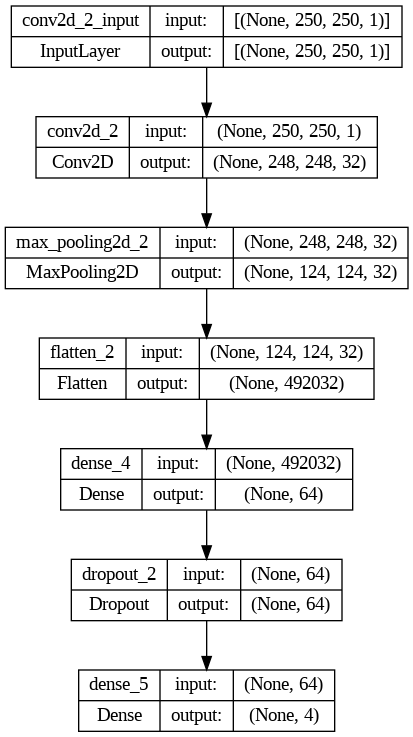

In [12]:
tf.keras.utils.plot_model(hyperModel, show_shapes=True) # Use `plot_model` found in `tf.keras.utils` namespace, pass the trained `hyperModel` and show_shape set to True

In [13]:
eval_result = hyperModel.evaluate(X_test_scaled2, y_test) # Use the evaluate function a part of the `hyperModel` object passing `X_valid` and `y_valid`
print('[test loss, test accuracy]:', eval_result)

6/6 [==============================] - 3s 415ms/step - loss: 4.7093 - accuracy: 0.4444
[test loss, test accuracy]: [4.709310531616211, 0.4444444477558136]


In [14]:
print(classification_report(y_test.argmax(axis=1), hyperModel.predict(X_test_scaled2).argmax(axis=1))) # Generate the Classification Report using the `classification_report` function passing `y_valid` and the predictions retreived from `hyperModel.predict` both need have argmax(axis=1) applied to them.

6/6 [==============================] - 2s 378ms/step
              precision    recall  f1-score   support

           0       0.50      0.09      0.16        32
           1       0.45      0.86      0.59        80
           2       0.17      0.10      0.12        21
           3       0.60      0.13      0.21        47

    accuracy                           0.44       180
   macro avg       0.43      0.29      0.27       180
weighted avg       0.47      0.44      0.36       180



6/6 [==============================] - 2s 408ms/step


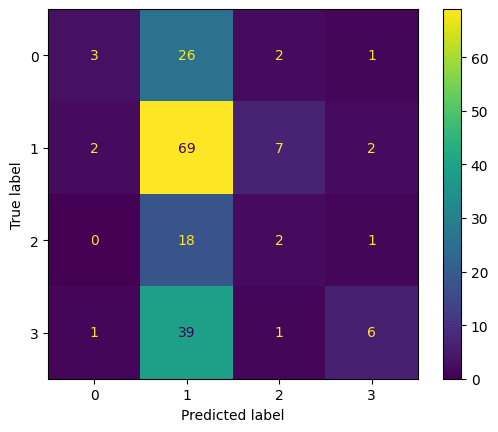

In [15]:
ConfusionMatrixDisplay.from_predictions(y_test.argmax(axis=1), hyperModel.predict(X_test_scaled2).argmax(axis=1)) # Generate the Confusion Matrix using the `ConfusionMatrixDisplay.from_predictions` passing `y_valid` and the predictions retreived from `hyperModel.predict` both need have argmax(axis=1) applied to them.

# Trial 7: All data KNN

In [ ]:
images = []
data = []
target = []

labels = {'Cofield':0, 'Depuy':1, 'Tornier':2, 'Zimmer':3}

for filename in uploaded.keys():
    class_name = filename.split('.')[0]
    label = labels.get(class_name)

    image = Image.open(filename)
    image = image.resize((250,250))
    image = image.convert('L')
    image = np.array(image)
    image_reshape = image.reshape(-1)

    images.append(image)
    data.append(image_reshape)
    target.append(label)

images = np.array(images)
target = np.array(target)
data = np.array(data)

In [ ]:
X = data.copy()
y = target.copy()

y = tf.keras.utils.to_categorical(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, shuffle=True, random_state=1)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled2 = X_train.astype('float32')
X_test_scaled2 = X_test.astype('float32')

X_train_scaled2 = X_train_scaled2/255.0
X_test_scaled2 = X_test_scaled2/255.0

### Testing

In [ ]:
best_accuracy = 0.0
best_model = None
max_n_neighbours = 25

kf = KFold(n_splits=10, shuffle=True, random_state=1)

for weights in ["uniform", "distance"]:
  print(weights)
  for metric in ["euclidean", "manhattan"]:
    print(metric)
    for k in range(1, max_n_neighbours):
      clf = KNeighborsClassifier(n_neighbors=k, weights=weights, metric=metric)

      accuracies = cross_val_score(clf, X_train_scaled, y_train, cv=kf)

      mean_accuracy = accuracies.mean()

      if mean_accuracy > best_accuracy:
        best_accuracy = mean_accuracy
        best_model = clf
        best_k = k
        best_weights = weights
        best_metric = metric

      print("k %s, accuracy: %s" %(k, mean_accuracy))

best_model.fit(X_train_scaled, y_train)

uniform
euclidean
k 1, accuracy: 0.41480836236933794
k 2, accuracy: 0.2180603948896632
k 3, accuracy: 0.3739256678281069
k 4, accuracy: 0.254006968641115
k 5, accuracy: 0.3883275261324042
k 6, accuracy: 0.26120789779326364
k 7, accuracy: 0.35725900116144016
k 8, accuracy: 0.306910569105691
k 9, accuracy: 0.35725900116144016
k 10, accuracy: 0.3045296167247386
k 11, accuracy: 0.3790360046457607
k 12, accuracy: 0.3166085946573751
k 13, accuracy: 0.3621951219512195
k 14, accuracy: 0.31898954703832755
k 15, accuracy: 0.3645760743321719
k 16, accuracy: 0.32624854819976773
k 17, accuracy: 0.371718931475029
k 18, accuracy: 0.3308943089430894
k 19, accuracy: 0.3573170731707317
k 20, accuracy: 0.328397212543554
k 21, accuracy: 0.3644599303135888
k 22, accuracy: 0.328397212543554
k 23, accuracy: 0.35481997677119625
k 24, accuracy: 0.33565621370499416
manhattan
k 1, accuracy: 0.414692218350755
k 2, accuracy: 0.2470383275261324
k 3, accuracy: 0.42212543554006965
k 4, accuracy: 0.2829849012775842
k 

KNeighborsClassifier(metric='manhattan', n_neighbors=4, weights='distance')

In [ ]:
print("Best accuracy:", best_accuracy)
print("Best k:", best_k)
print("Best weights:", best_weights)
print("Best model:", best_model)

Best accuracy: 0.43635307781649246
Best k: 4
Best weights: distance
Best model: KNeighborsClassifier(metric='manhattan', n_neighbors=4, weights='distance')


In [ ]:
print(classification_report(y_test.argmax(axis=1), best_model.predict(X_test_scaled).argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.23      0.38      0.29        32
           1       0.50      0.65      0.57        80
           2       0.00      0.00      0.00        21
           3       0.33      0.17      0.23        47

    accuracy                           0.40       180
   macro avg       0.27      0.30      0.27       180
weighted avg       0.35      0.40      0.36       180



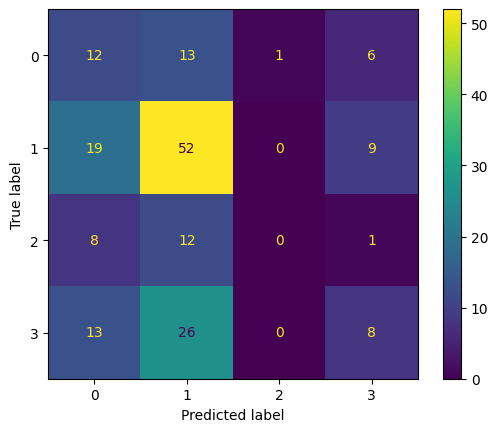

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test.argmax(axis=1), best_model.predict(X_test_scaled).argmax(axis=1))

In [ ]:
best_accuracy = 0.0
best_model = None
max_n_neighbours = 25

kf = KFold(n_splits=10, shuffle=True, random_state=1)

for weights in ["uniform", "distance"]:
  print(weights)
  for metric in ["euclidean", "manhattan"]:
    print(metric)
    for k in range(1, max_n_neighbours):
      clf = KNeighborsClassifier(n_neighbors=k, weights=weights, metric=metric)

      accuracies = cross_val_score(clf, X_train_scaled2, y_train, cv=kf)

      mean_accuracy = accuracies.mean()

      if mean_accuracy > best_accuracy:
        best_accuracy = mean_accuracy
        best_model = clf
        best_k = k
        best_weights = weights
        best_metric = metric

      print("k %s, accuracy: %s" %(k, mean_accuracy))

best_model.fit(X_train_scaled2, y_train)

uniform
euclidean
k 1, accuracy: 0.39314750290360045
k 2, accuracy: 0.2059814169570267
k 3, accuracy: 0.3860046457607432
k 4, accuracy: 0.26852497096399536
k 5, accuracy: 0.38867595818815326
k 6, accuracy: 0.28536585365853656
k 7, accuracy: 0.3668989547038327
k 8, accuracy: 0.3093495934959349
k 9, accuracy: 0.37409988385598136
k 10, accuracy: 0.2854239256678281
k 11, accuracy: 0.3430313588850174
k 12, accuracy: 0.2879210220673635
k 13, accuracy: 0.33583042973286875
k 14, accuracy: 0.2927990708478513
k 15, accuracy: 0.32624854819976773
k 16, accuracy: 0.287979094076655
k 17, accuracy: 0.3479094076655052
k 18, accuracy: 0.3070847851335656
k 19, accuracy: 0.35725900116144016
k 20, accuracy: 0.3213124274099884
k 21, accuracy: 0.3452961672473867
k 22, accuracy: 0.3188734030197445
k 23, accuracy: 0.35749128919860623
k 24, accuracy: 0.3141695702671312
manhattan
k 1, accuracy: 0.4144018583042973
k 2, accuracy: 0.2422183507549361
k 3, accuracy: 0.43896631823461096
k 4, accuracy: 0.2732868757259

KNeighborsClassifier(metric='manhattan', n_neighbors=3)

In [ ]:
print("Best accuracy:", best_accuracy)
print("Best k:", best_k)
print("Best weights:", best_weights)
print("Best model:", best_model)

Best accuracy: 0.43896631823461096
Best k: 3
Best weights: uniform
Best model: KNeighborsClassifier(metric='manhattan', n_neighbors=3)


In [ ]:
print(classification_report(y_test.argmax(axis=1), best_model.predict(X_test_scaled2).argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.23      0.38      0.28        32
           1       0.49      0.61      0.55        80
           2       0.00      0.00      0.00        21
           3       0.38      0.19      0.25        47

    accuracy                           0.39       180
   macro avg       0.27      0.29      0.27       180
weighted avg       0.36      0.39      0.36       180



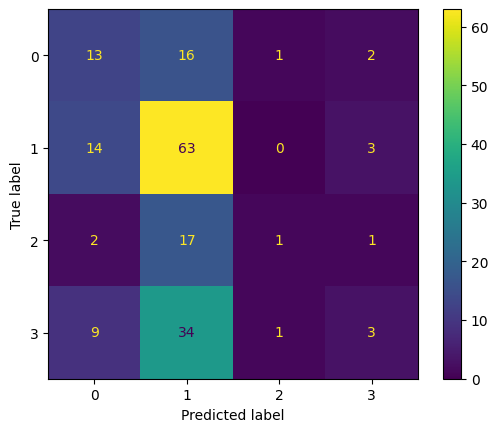

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test.argmax(axis=1), best_model.predict(X_test_scaled).argmax(axis=1))

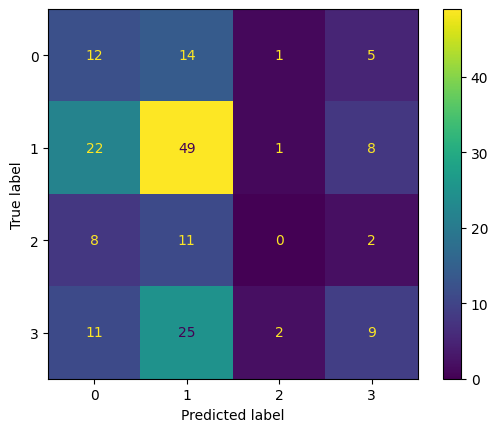

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test.argmax(axis=1), best_model.predict(X_test_scaled2).argmax(axis=1))

# Trial 8: Top 2 to 150 (with KNN)

In [ ]:
images = []
data = []
target = []

labels = {'Cofield':0, 'Depuy':1, 'Tornier':2, 'Zimmer':3}

for filename in uploaded.keys():
    class_name = filename.split('.')[0]
    label = labels.get(class_name)

    if(target.count('Depuy')<150):
        image = Image.open(filename)
        image = image.resize((250,250))
        image = image.convert('L')
        image = np.array(image)
        image_reshape = image.reshape(-1)
        images.append(image)
        data.append(image_reshape)
        target.append(label)
    elif((target.count('Zimmer')<150) & (class_name != 'Depuy')):
        image = Image.open(filename)
        image = image.resize((250,250))
        image = image.convert('L')
        image = np.array(image)
        image_reshape = image.reshape(-1)
        images.append(image)
        data.append(image_reshape)
        target.append(label)

images = np.array(images)
target = np.array(target)
data = np.array(data)

In [ ]:
X = data.copy()
y = target.copy()

y = tf.keras.utils.to_categorical(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, shuffle=True, random_state=1)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled2 = X_train.astype('float32')
X_test_scaled2 = X_test.astype('float32')

X_train_scaled2 = X_train_scaled2/255.0
X_test_scaled2 = X_test_scaled2/255.0

### Testing KNN

In [ ]:
best_accuracy = 0.0
best_model = None
max_n_neighbours = 25

kf = KFold(n_splits=10, shuffle=True, random_state=1)

for weights in ["uniform", "distance"]:
  print(weights)
  for metric in ["euclidean", "manhattan"]:
    print(metric)
    for k in range(1, max_n_neighbours):
      clf = KNeighborsClassifier(n_neighbors=k, weights=weights, metric=metric)

      accuracies = cross_val_score(clf, X_train_scaled, y_train, cv=kf)

      mean_accuracy = accuracies.mean()

      if mean_accuracy > best_accuracy:
        best_accuracy = mean_accuracy
        best_model = clf
        best_k = k
        best_weights = weights
        best_metric = metric

      print("k %s, accuracy: %s" %(k, mean_accuracy))

best_model.fit(X_train_scaled, y_train)

uniform
euclidean
k 1, accuracy: 0.41480836236933794
k 2, accuracy: 0.2180603948896632
k 3, accuracy: 0.3739256678281069
k 4, accuracy: 0.254006968641115
k 5, accuracy: 0.3883275261324042
k 6, accuracy: 0.26120789779326364
k 7, accuracy: 0.35725900116144016
k 8, accuracy: 0.306910569105691
k 9, accuracy: 0.35725900116144016
k 10, accuracy: 0.3045296167247386
k 11, accuracy: 0.3790360046457607
k 12, accuracy: 0.3166085946573751
k 13, accuracy: 0.3621951219512195
k 14, accuracy: 0.31898954703832755
k 15, accuracy: 0.3645760743321719
k 16, accuracy: 0.32624854819976773
k 17, accuracy: 0.371718931475029
k 18, accuracy: 0.3308943089430894
k 19, accuracy: 0.3573170731707317
k 20, accuracy: 0.328397212543554
k 21, accuracy: 0.3644599303135888
k 22, accuracy: 0.328397212543554
k 23, accuracy: 0.35481997677119625
k 24, accuracy: 0.33565621370499416
manhattan
k 1, accuracy: 0.414692218350755
k 2, accuracy: 0.2470383275261324
k 3, accuracy: 0.42212543554006965
k 4, accuracy: 0.2829849012775842
k 

KNeighborsClassifier(metric='manhattan', n_neighbors=4, weights='distance')

In [ ]:
print("Best accuracy:", best_accuracy)
print("Best k:", best_k)
print("Best weights:", best_weights)
print("Best model:", best_model)

Best accuracy: 0.43635307781649246
Best k: 4
Best weights: distance
Best model: KNeighborsClassifier(metric='manhattan', n_neighbors=4, weights='distance')


In [ ]:
print(classification_report(y_test.argmax(axis=1), best_model.predict(X_test_scaled).argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.23      0.38      0.29        32
           1       0.50      0.65      0.57        80
           2       0.00      0.00      0.00        21
           3       0.33      0.17      0.23        47

    accuracy                           0.40       180
   macro avg       0.27      0.30      0.27       180
weighted avg       0.35      0.40      0.36       180



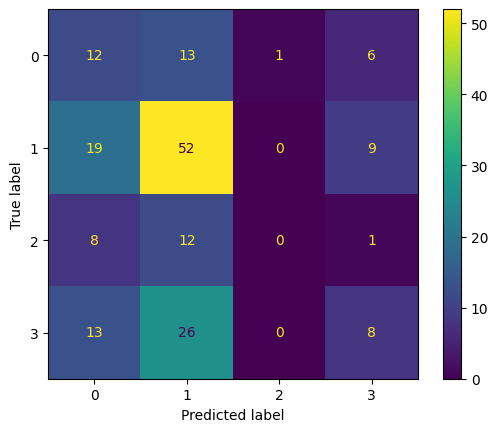

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test.argmax(axis=1), best_model.predict(X_test_scaled).argmax(axis=1))

In [ ]:
best_accuracy = 0.0
best_model = None
max_n_neighbours = 25

kf = KFold(n_splits=10, shuffle=True, random_state=1)

for weights in ["uniform", "distance"]:
  print(weights)
  for metric in ["euclidean", "manhattan"]:
    print(metric)
    for k in range(1, max_n_neighbours):
      clf = KNeighborsClassifier(n_neighbors=k, weights=weights, metric=metric)

      accuracies = cross_val_score(clf, X_train_scaled2, y_train, cv=kf)

      mean_accuracy = accuracies.mean()

      if mean_accuracy > best_accuracy:
        best_accuracy = mean_accuracy
        best_model = clf
        best_k = k
        best_weights = weights
        best_metric = metric

      print("k %s, accuracy: %s" %(k, mean_accuracy))

best_model.fit(X_train_scaled2, y_train)

uniform
euclidean
k 1, accuracy: 0.39314750290360045
k 2, accuracy: 0.2059814169570267
k 3, accuracy: 0.3860046457607432
k 4, accuracy: 0.26852497096399536
k 5, accuracy: 0.38867595818815326
k 6, accuracy: 0.28536585365853656
k 7, accuracy: 0.3668989547038327
k 8, accuracy: 0.3093495934959349
k 9, accuracy: 0.37409988385598136
k 10, accuracy: 0.2854239256678281
k 11, accuracy: 0.3430313588850174
k 12, accuracy: 0.2879210220673635
k 13, accuracy: 0.33583042973286875
k 14, accuracy: 0.2927990708478513
k 15, accuracy: 0.32624854819976773
k 16, accuracy: 0.287979094076655
k 17, accuracy: 0.3479094076655052
k 18, accuracy: 0.3070847851335656
k 19, accuracy: 0.35725900116144016
k 20, accuracy: 0.3213124274099884
k 21, accuracy: 0.3452961672473867
k 22, accuracy: 0.3188734030197445
k 23, accuracy: 0.35749128919860623
k 24, accuracy: 0.3141695702671312
manhattan
k 1, accuracy: 0.4144018583042973
k 2, accuracy: 0.2422183507549361
k 3, accuracy: 0.43896631823461096
k 4, accuracy: 0.2732868757259

KNeighborsClassifier(metric='manhattan', n_neighbors=3)

In [ ]:
print("Best accuracy:", best_accuracy)
print("Best k:", best_k)
print("Best weights:", best_weights)
print("Best model:", best_model)

Best accuracy: 0.43896631823461096
Best k: 3
Best weights: uniform
Best model: KNeighborsClassifier(metric='manhattan', n_neighbors=3)


In [ ]:
print(classification_report(y_test.argmax(axis=1), best_model.predict(X_test_scaled2).argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.23      0.38      0.28        32
           1       0.49      0.61      0.55        80
           2       0.00      0.00      0.00        21
           3       0.38      0.19      0.25        47

    accuracy                           0.39       180
   macro avg       0.27      0.29      0.27       180
weighted avg       0.36      0.39      0.36       180



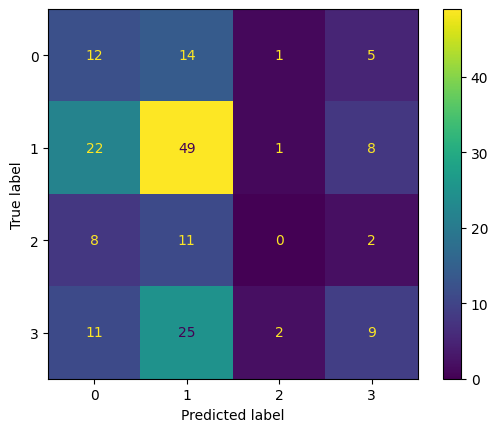

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test.argmax(axis=1), best_model.predict(X_test_scaled2).argmax(axis=1))

# Trial 9: Top 2 to 100 (with KNN)

In [ ]:
images = []
data = []
target = []

labels = {'Cofield':0, 'Depuy':1, 'Tornier':2, 'Zimmer':3}

for filename in uploaded.keys():
    class_name = filename.split('.')[0]
    label = labels.get(class_name)

    if(target.count('Depuy')<100):
        image = Image.open(filename)
        image = image.resize((250,250))
        image = image.convert('L')
        image = np.array(image)
        image_reshape = image.reshape(-1)
        images.append(image)
        data.append(image_reshape)
        target.append(label)
    elif((target.count('Zimmer')<100) & (class_name != 'Depuy')):
        image = Image.open(filename)
        image = image.resize((250,250))
        image = image.convert('L')
        image = np.array(image)
        image_reshape = image.reshape(-1)
        images.append(image)
        data.append(image_reshape)
        target.append(label)

images = np.array(images)
target = np.array(target)
data = np.array(data)

In [ ]:
X = data.copy()
y = target.copy()

y = tf.keras.utils.to_categorical(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, shuffle=True, random_state=1)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled2 = X_train.astype('float32')
X_test_scaled2 = X_test.astype('float32')

X_train_scaled2 = X_train_scaled2/255.0
X_test_scaled2 = X_test_scaled2/255.0

### Testing KNN

In [ ]:
best_accuracy = 0.0
best_model = None
max_n_neighbours = 25

kf = KFold(n_splits=10, shuffle=True, random_state=1)

for weights in ["uniform", "distance"]:
  print(weights)
  for metric in ["euclidean", "manhattan"]:
    print(metric)
    for k in range(1, max_n_neighbours):
      clf = KNeighborsClassifier(n_neighbors=k, weights=weights, metric=metric)

      accuracies = cross_val_score(clf, X_train_scaled, y_train, cv=kf)

      mean_accuracy = accuracies.mean()

      if mean_accuracy > best_accuracy:
        best_accuracy = mean_accuracy
        best_model = clf
        best_k = k
        best_weights = weights
        best_metric = metric

      print("k %s, accuracy: %s" %(k, mean_accuracy))

best_model.fit(X_train_scaled, y_train)

uniform
euclidean
k 1, accuracy: 0.41480836236933794
k 2, accuracy: 0.2180603948896632
k 3, accuracy: 0.3739256678281069
k 4, accuracy: 0.254006968641115
k 5, accuracy: 0.3883275261324042
k 6, accuracy: 0.26120789779326364
k 7, accuracy: 0.35725900116144016
k 8, accuracy: 0.306910569105691
k 9, accuracy: 0.35725900116144016
k 10, accuracy: 0.3045296167247386
k 11, accuracy: 0.3790360046457607
k 12, accuracy: 0.3166085946573751
k 13, accuracy: 0.3621951219512195
k 14, accuracy: 0.31898954703832755
k 15, accuracy: 0.3645760743321719
k 16, accuracy: 0.32624854819976773
k 17, accuracy: 0.371718931475029
k 18, accuracy: 0.3308943089430894
k 19, accuracy: 0.3573170731707317
k 20, accuracy: 0.328397212543554
k 21, accuracy: 0.3644599303135888
k 22, accuracy: 0.328397212543554
k 23, accuracy: 0.35481997677119625
k 24, accuracy: 0.33565621370499416
manhattan
k 1, accuracy: 0.414692218350755
k 2, accuracy: 0.2470383275261324
k 3, accuracy: 0.42212543554006965
k 4, accuracy: 0.2829849012775842
k 

KNeighborsClassifier(metric='manhattan', n_neighbors=4, weights='distance')

In [ ]:
print("Best accuracy:", best_accuracy)
print("Best k:", best_k)
print("Best weights:", best_weights)
print("Best model:", best_model)

Best accuracy: 0.43635307781649246
Best k: 4
Best weights: distance
Best model: KNeighborsClassifier(metric='manhattan', n_neighbors=4, weights='distance')


In [ ]:
print(classification_report(y_test.argmax(axis=1), best_model.predict(X_test_scaled).argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.23      0.38      0.29        32
           1       0.50      0.65      0.57        80
           2       0.00      0.00      0.00        21
           3       0.33      0.17      0.23        47

    accuracy                           0.40       180
   macro avg       0.27      0.30      0.27       180
weighted avg       0.35      0.40      0.36       180



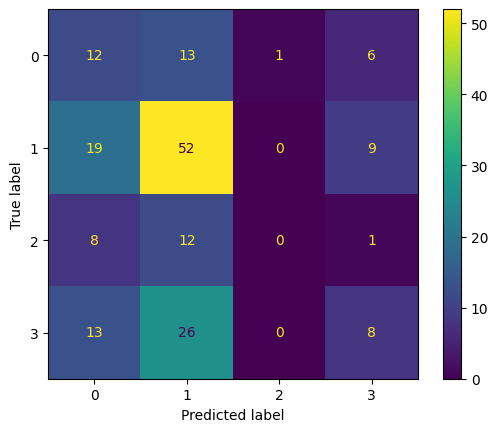

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test.argmax(axis=1), best_model.predict(X_test_scaled).argmax(axis=1))

In [ ]:
best_accuracy = 0.0
best_model = None
max_n_neighbours = 25

kf = KFold(n_splits=10, shuffle=True, random_state=1)

for weights in ["uniform", "distance"]:
  print(weights)
  for metric in ["euclidean", "manhattan"]:
    print(metric)
    for k in range(1, max_n_neighbours):
      clf = KNeighborsClassifier(n_neighbors=k, weights=weights, metric=metric)

      accuracies = cross_val_score(clf, X_train_scaled2, y_train, cv=kf)

      mean_accuracy = accuracies.mean()

      if mean_accuracy > best_accuracy:
        best_accuracy = mean_accuracy
        best_model = clf
        best_k = k
        best_weights = weights
        best_metric = metric

      print("k %s, accuracy: %s" %(k, mean_accuracy))

best_model.fit(X_train_scaled2, y_train)

uniform
euclidean
k 1, accuracy: 0.39314750290360045
k 2, accuracy: 0.2059814169570267
k 3, accuracy: 0.3860046457607432
k 4, accuracy: 0.26852497096399536
k 5, accuracy: 0.38867595818815326
k 6, accuracy: 0.28536585365853656
k 7, accuracy: 0.3668989547038327
k 8, accuracy: 0.3093495934959349
k 9, accuracy: 0.37409988385598136
k 10, accuracy: 0.2854239256678281
k 11, accuracy: 0.3430313588850174
k 12, accuracy: 0.2879210220673635
k 13, accuracy: 0.33583042973286875
k 14, accuracy: 0.2927990708478513
k 15, accuracy: 0.32624854819976773
k 16, accuracy: 0.287979094076655
k 17, accuracy: 0.3479094076655052
k 18, accuracy: 0.3070847851335656
k 19, accuracy: 0.35725900116144016
k 20, accuracy: 0.3213124274099884
k 21, accuracy: 0.3452961672473867
k 22, accuracy: 0.3188734030197445
k 23, accuracy: 0.35749128919860623
k 24, accuracy: 0.3141695702671312
manhattan
k 1, accuracy: 0.4144018583042973
k 2, accuracy: 0.2422183507549361
k 3, accuracy: 0.43896631823461096
k 4, accuracy: 0.2732868757259

KNeighborsClassifier(metric='manhattan', n_neighbors=3)

In [ ]:
print("Best accuracy:", best_accuracy)
print("Best k:", best_k)
print("Best weights:", best_weights)
print("Best model:", best_model)

Best accuracy: 0.43896631823461096
Best k: 3
Best weights: uniform
Best model: KNeighborsClassifier(metric='manhattan', n_neighbors=3)


In [ ]:
print(classification_report(y_test.argmax(axis=1), best_model.predict(X_test_scaled2).argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.23      0.38      0.28        32
           1       0.49      0.61      0.55        80
           2       0.00      0.00      0.00        21
           3       0.38      0.19      0.25        47

    accuracy                           0.39       180
   macro avg       0.27      0.29      0.27       180
weighted avg       0.36      0.39      0.36       180



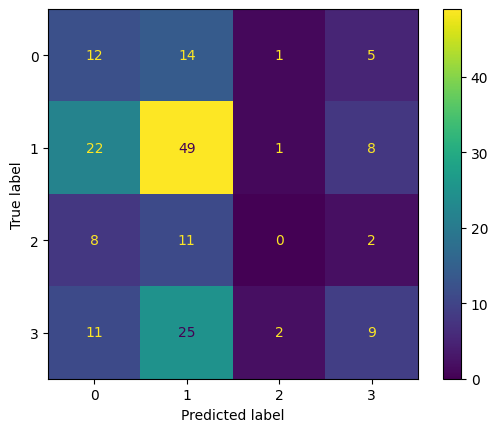

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test.argmax(axis=1), best_model.predict(X_test_scaled2).argmax(axis=1))

# Trial 10: All data Random Forest

In [ ]:
images = []
data = []
target = []

labels = {'Cofield':0, 'Depuy':1, 'Tornier':2, 'Zimmer':3}

for filename in uploaded.keys():
    class_name = filename.split('.')[0]
    label = labels.get(class_name)

    image = Image.open(filename)
    image = image.resize((250,250))
    image = image.convert('L')
    image = np.array(image)
    image_reshape = image.reshape(-1)

    images.append(image)
    data.append(image_reshape)
    target.append(label)

images = np.array(images)
target = np.array(target)
data = np.array(data)

In [ ]:
X = data.copy()
y = target.copy()

y = tf.keras.utils.to_categorical(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, shuffle=True, random_state=1)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled2 = X_train.astype('float32')
X_test_scaled2 = X_test.astype('float32')

X_train_scaled2 = X_train_scaled2/255.0
X_test_scaled2 = X_test_scaled2/255.0

### Testing random forest

In [ ]:
best_accuracy = 0.0
best_model = None
n_estimate = [100, 300, 500, 700, 1000]
max_depth = [5,10]

kf = KFold(n_splits=10, shuffle=True, random_state=1)

for estimate in n_estimate:
  print('n_estimate:', estimate)
  for max in max_depth:
    print('max_depth:', max)
    for k in ['gini', 'entropy']:
      clf_rf = RandomForestClassifier(n_estimators=estimate, max_depth=max, criterion=k)

      accuracies = cross_val_score(clf_rf, X_train_scaled, y_train, cv=kf)

      mean_accuracy = accuracies.mean()

      if mean_accuracy > best_accuracy:
        best_accuracy = mean_accuracy
        best_model = clf_rf
        best_criterion = k
        best_depth = max
        best_estimator = estimate

      print("k %s, accuracy: %s" %(k, mean_accuracy))

best_model.fit(X_train_scaled, y_train)

n_estimate: 100
max_depth: 5
k gini, accuracy: 0.393437862950058
k entropy, accuracy: 0.3715447154471544
max_depth: 10
k gini, accuracy: 0.35969802555168406
k entropy, accuracy: 0.37891986062717764
n_estimate: 300
max_depth: 5
k gini, accuracy: 0.3957607433217189
k entropy, accuracy: 0.36695702671312425
max_depth: 10
k gini, accuracy: 0.3692799070847851
k entropy, accuracy: 0.3787456445993031
n_estimate: 500
max_depth: 5
k gini, accuracy: 0.38606271777003476
k entropy, accuracy: 0.3764227642276422
max_depth: 10
k gini, accuracy: 0.35255516840882695
k entropy, accuracy: 0.37392566782810677
n_estimate: 700
max_depth: 5
k gini, accuracy: 0.3837398373983739
k entropy, accuracy: 0.35969802555168406
max_depth: 10
k gini, accuracy: 0.3549941927990708
k entropy, accuracy: 0.3716027874564459
n_estimate: 1000
max_depth: 5
k gini, accuracy: 0.383855981416957
k entropy, accuracy: 0.36451800232288034
max_depth: 10
k gini, accuracy: 0.3668989547038327
k entropy, accuracy: 0.37392566782810677


RandomForestClassifier(max_depth=5, n_estimators=300)

In [ ]:
print("Best accuracy:", best_accuracy)
print("Best criterion:", best_criterion)
print("Best depths:", best_depth)
print("Best estimator:", best_estimator)
print("Best estimator:", best_model)

Best accuracy: 0.3957607433217189
Best criterion: gini
Best depths: 5
Best estimator: 300
Best estimator: RandomForestClassifier(max_depth=5, n_estimators=300)


In [ ]:
print(classification_report(y_test.argmax(axis=1), best_model.predict(X_test_scaled).argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.30      0.72      0.43        32
           1       0.61      0.75      0.67        80
           2       0.00      0.00      0.00        21
           3       0.67      0.09      0.15        47

    accuracy                           0.48       180
   macro avg       0.40      0.39      0.31       180
weighted avg       0.50      0.48      0.41       180



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


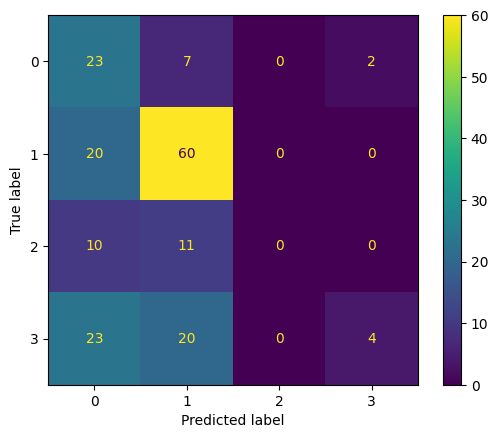

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test.argmax(axis=1), best_model.predict(X_test_scaled).argmax(axis=1))

In [ ]:
best_accuracy = 0.0
best_model = None
n_estimate = [100, 500, 1000]
max_depth = [5,10]

kf = KFold(n_splits=10, shuffle=True, random_state=1)

for estimate in n_estimate:
  print('n_estimate:', estimate)
  for max in max_depth:
    print('max_depth:', max)
    for k in ['gini', 'entropy']:
      clf_rf = RandomForestClassifier(n_estimators=estimate, max_depth=max, criterion=k)

      accuracies = cross_val_score(clf_rf, X_train_scaled2, y_train, cv=kf)

      mean_accuracy = accuracies.mean()

      if mean_accuracy > best_accuracy:
        best_accuracy = mean_accuracy
        best_model = clf_rf
        best_criterion = k
        best_depth = max
        best_estimator = estimate

      print("k %s, accuracy: %s" %(k, mean_accuracy))

best_model.fit(X_train_scaled2, y_train)

n_estimate: 100
max_depth: 5
k gini, accuracy: 0.4052264808362369
k entropy, accuracy: 0.38368176538908244
max_depth: 10
k gini, accuracy: 0.3693379790940766
k entropy, accuracy: 0.37409988385598136
n_estimate: 500
max_depth: 5
k gini, accuracy: 0.3839140534262485
k entropy, accuracy: 0.3668989547038327
max_depth: 10
k gini, accuracy: 0.3620209059233449
k entropy, accuracy: 0.3788037166085946
n_estimate: 1000
max_depth: 5
k gini, accuracy: 0.37653890824622527
k entropy, accuracy: 0.371718931475029
max_depth: 10
k gini, accuracy: 0.3644599303135888
k entropy, accuracy: 0.36678281068524965


RandomForestClassifier(max_depth=5)

In [ ]:
print("Best accuracy:", best_accuracy)
print("Best criterion:", best_criterion)
print("Best depths:", best_depth)
print("Best estimator:", best_estimator)
print("Best estimator:", best_model)

Best accuracy: 0.4052264808362369
Best criterion: gini
Best depths: 5
Best estimator: 100
Best estimator: RandomForestClassifier(max_depth=5)


In [ ]:
print(classification_report(y_test.argmax(axis=1), best_model.predict(X_test_scaled2).argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.30      0.66      0.42        32
           1       0.56      0.74      0.64        80
           2       0.00      0.00      0.00        21
           3       0.67      0.09      0.15        47

    accuracy                           0.47       180
   macro avg       0.38      0.37      0.30       180
weighted avg       0.48      0.47      0.40       180



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


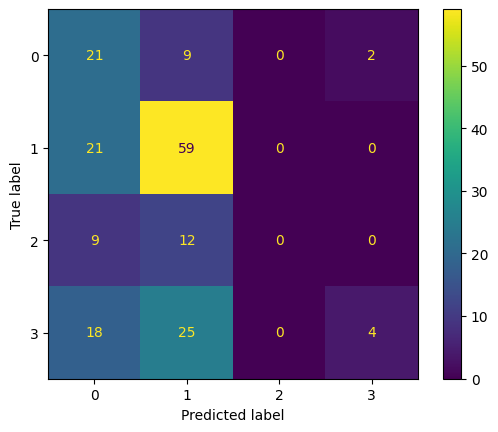

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test.argmax(axis=1), best_model.predict(X_test_scaled2).argmax(axis=1))

# Trial 11: Top 2 to 150 (Random Forest)

In [ ]:
images = []
data = []
target = []

labels = {'Cofield':0, 'Depuy':1, 'Tornier':2, 'Zimmer':3}

for filename in uploaded.keys():
    class_name = filename.split('.')[0]
    label = labels.get(class_name)

    if(target.count('Depuy')<150):
        image = Image.open(filename)
        image = image.resize((250,250))
        image = image.convert('L')
        image = np.array(image)
        image_reshape = image.reshape(-1)
        images.append(image)
        data.append(image_reshape)
        target.append(label)
    elif((target.count('Zimmer')<150) & (class_name != 'Depuy')):
        image = Image.open(filename)
        image = image.resize((250,250))
        image = image.convert('L')
        image = np.array(image)
        image_reshape = image.reshape(-1)
        images.append(image)
        data.append(image_reshape)
        target.append(label)

images = np.array(images)
target = np.array(target)
data = np.array(data)

In [ ]:
X = data.copy()
y = target.copy()

y = tf.keras.utils.to_categorical(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, shuffle=True, random_state=1)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled2 = X_train.astype('float32')
X_test_scaled2 = X_test.astype('float32')

X_train_scaled2 = X_train_scaled2/255.0
X_test_scaled2 = X_test_scaled2/255.0

### Testing random forest

In [ ]:
best_accuracy = 0.0
best_model = None
n_estimate = [100, 500, 1000]
max_depth = [5]

kf = KFold(n_splits=10, shuffle=True, random_state=1)

for estimate in n_estimate:
  print('n_estimate:', estimate)
  for max in max_depth:
    print('max_depth:', max)
    for k in ['gini', 'entropy']:
      clf_rf = RandomForestClassifier(n_estimators=estimate, max_depth=max, criterion=k)

      accuracies = cross_val_score(clf_rf, X_train_scaled, y_train, cv=kf)

      mean_accuracy = accuracies.mean()

      if mean_accuracy > best_accuracy:
        best_accuracy = mean_accuracy
        best_model = clf_rf
        best_criterion = k
        best_depth = max
        best_estimator = estimate

      print("k %s, accuracy: %s" %(k, mean_accuracy))

best_model.fit(X_train_scaled, y_train)

n_estimate: 100
max_depth: 5
k gini, accuracy: 0.37653890824622527
k entropy, accuracy: 0.3765969802555168
n_estimate: 500
max_depth: 5
k gini, accuracy: 0.37891986062717764
k entropy, accuracy: 0.3812427409988385
n_estimate: 1000
max_depth: 5
k gini, accuracy: 0.3837398373983739
k entropy, accuracy: 0.37653890824622527


RandomForestClassifier(max_depth=5, n_estimators=1000)

In [ ]:
print("Best accuracy:", best_accuracy)
print("Best criterion:", best_criterion)
print("Best depths:", best_depth)
print("Best estimator:", best_estimator)
print("Best estimator:", best_model)

Best accuracy: 0.3837398373983739
Best criterion: gini
Best depths: 5
Best estimator: 1000
Best estimator: RandomForestClassifier(max_depth=5, n_estimators=1000)


In [ ]:
print(classification_report(y_test.argmax(axis=1), best_model.predict(X_test_scaled).argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.30      0.72      0.43        32
           1       0.59      0.74      0.66        80
           2       0.00      0.00      0.00        21
           3       0.50      0.04      0.08        47

    accuracy                           0.47       180
   macro avg       0.35      0.37      0.29       180
weighted avg       0.45      0.47      0.39       180



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


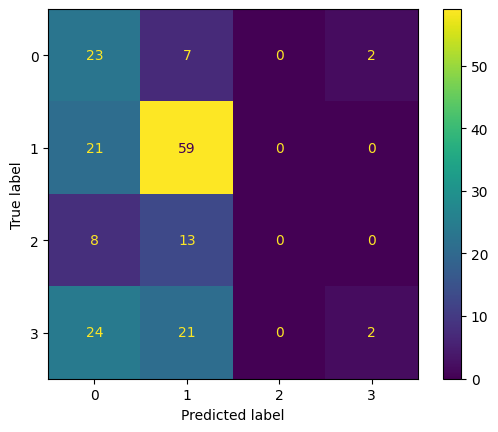

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test.argmax(axis=1), best_model.predict(X_test_scaled).argmax(axis=1))

In [ ]:
best_accuracy = 0.0
best_model = None
n_estimate = [100, 500, 1000]
max_depth = [5]

kf = KFold(n_splits=10, shuffle=True, random_state=1)

for estimate in n_estimate:
  print('n_estimate:', estimate)
  for max in max_depth:
    print('max_depth:', max)
    for k in ['gini', 'entropy']:
      clf_rf = RandomForestClassifier(n_estimators=estimate, max_depth=max, criterion=k)

      accuracies = cross_val_score(clf_rf, X_train_scaled2, y_train, cv=kf)

      mean_accuracy = accuracies.mean()

      if mean_accuracy > best_accuracy:
        best_accuracy = mean_accuracy
        best_model = clf_rf
        best_criterion = k
        best_depth = max
        best_estimator = estimate

      print("k %s, accuracy: %s" %(k, mean_accuracy))

best_model.fit(X_train_scaled2, y_train)

n_estimate: 100
max_depth: 5
k gini, accuracy: 0.3884436701509872
k entropy, accuracy: 0.371718931475029
n_estimate: 500
max_depth: 5
k gini, accuracy: 0.3861207897793263
k entropy, accuracy: 0.37166085946573746
n_estimate: 1000
max_depth: 5
k gini, accuracy: 0.38612078977932635
k entropy, accuracy: 0.36451800232288034


RandomForestClassifier(max_depth=5)

In [ ]:
print("Best accuracy:", best_accuracy)
print("Best criterion:", best_criterion)
print("Best depths:", best_depth)
print("Best estimator:", best_estimator)
print("Best estimator:", best_model)

Best accuracy: 0.3884436701509872
Best criterion: gini
Best depths: 5
Best estimator: 100
Best estimator: RandomForestClassifier(max_depth=5)


In [ ]:
print(classification_report(y_test.argmax(axis=1), best_model.predict(X_test_scaled2).argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.32      0.75      0.44        32
           1       0.61      0.74      0.67        80
           2       0.00      0.00      0.00        21
           3       0.62      0.11      0.18        47

    accuracy                           0.49       180
   macro avg       0.39      0.40      0.32       180
weighted avg       0.49      0.49      0.42       180



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


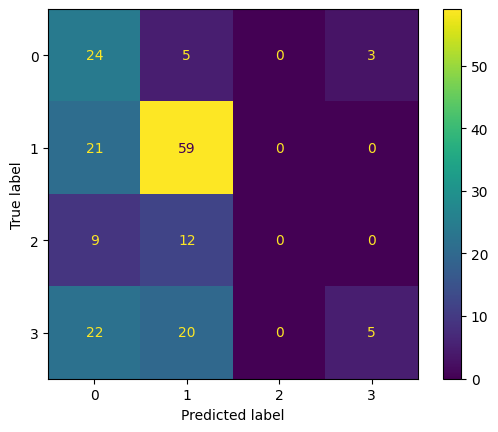

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test.argmax(axis=1), best_model.predict(X_test_scaled2).argmax(axis=1))

# Trial 12: Top 2 to 100 (Random Forest)

In [ ]:
images = []
data = []
target = []

labels = {'Cofield':0, 'Depuy':1, 'Tornier':2, 'Zimmer':3}

for filename in uploaded.keys():
    class_name = filename.split('.')[0]
    label = labels.get(class_name)

    if(target.count('Depuy')<100):
        image = Image.open(filename)
        image = image.resize((250,250))
        image = image.convert('L')
        image = np.array(image)
        image_reshape = image.reshape(-1)
        images.append(image)
        data.append(image_reshape)
        target.append(label)
    elif((target.count('Zimmer')<100) & (class_name != 'Depuy')):
        image = Image.open(filename)
        image = image.resize((250,250))
        image = image.convert('L')
        image = np.array(image)
        image_reshape = image.reshape(-1)
        images.append(image)
        data.append(image_reshape)
        target.append(label)

images = np.array(images)
target = np.array(target)
data = np.array(data)

In [ ]:
X = data.copy()
y = target.copy()

y = tf.keras.utils.to_categorical(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, shuffle=True, random_state=1)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled2 = X_train.astype('float32')
X_test_scaled2 = X_test.astype('float32')

X_train_scaled2 = X_train_scaled2/255.0
X_test_scaled2 = X_test_scaled2/255.0

### Testing random forest

In [ ]:
best_accuracy = 0.0
best_model = None
n_estimate = [100, 500, 1000]
max_depth = [5]

kf = KFold(n_splits=10, shuffle=True, random_state=1)

for estimate in n_estimate:
  print('n_estimate:', estimate)
  for max in max_depth:
    print('max_depth:', max)
    for k in ['gini', 'entropy']:
      clf_rf = RandomForestClassifier(n_estimators=estimate, max_depth=max, criterion=k)

      accuracies = cross_val_score(clf_rf, X_train_scaled, y_train, cv=kf)

      mean_accuracy = accuracies.mean()

      if mean_accuracy > best_accuracy:
        best_accuracy = mean_accuracy
        best_model = clf_rf
        best_criterion = k
        best_depth = max
        best_estimator = estimate

      print("k %s, accuracy: %s" %(k, mean_accuracy))

best_model.fit(X_train_scaled, y_train)

n_estimate: 100
max_depth: 5
k gini, accuracy: 0.3790360046457607
k entropy, accuracy: 0.3668989547038327
n_estimate: 500
max_depth: 5
k gini, accuracy: 0.3884436701509872
k entropy, accuracy: 0.371718931475029
n_estimate: 1000
max_depth: 5
k gini, accuracy: 0.38135888501742154
k entropy, accuracy: 0.3693379790940766


RandomForestClassifier(max_depth=5, n_estimators=500)

In [ ]:
print("Best accuracy:", best_accuracy)
print("Best criterion:", best_criterion)
print("Best depths:", best_depth)
print("Best estimator:", best_estimator)
print("Best estimator:", best_model)

Best accuracy: 0.3884436701509872
Best criterion: gini
Best depths: 5
Best estimator: 500
Best estimator: RandomForestClassifier(max_depth=5, n_estimators=500)


In [ ]:
print(classification_report(y_test.argmax(axis=1), best_model.predict(X_test_scaled).argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.30      0.75      0.43        32
           1       0.61      0.74      0.67        80
           2       0.00      0.00      0.00        21
           3       0.60      0.06      0.12        47

    accuracy                           0.48       180
   macro avg       0.38      0.39      0.30       180
weighted avg       0.48      0.48      0.40       180



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


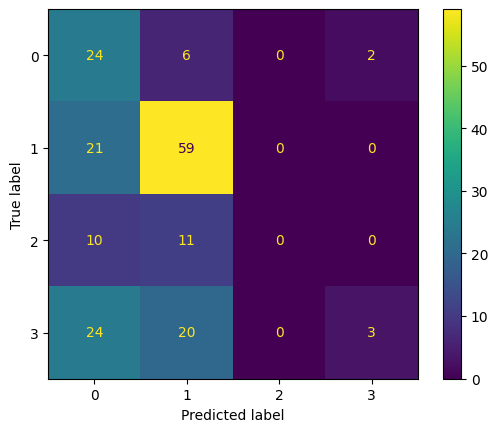

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test.argmax(axis=1), best_model.predict(X_test_scaled).argmax(axis=1))

In [ ]:
best_accuracy = 0.0
best_model = None
n_estimate = [100, 500, 1000]
max_depth = [5]

kf = KFold(n_splits=10, shuffle=True, random_state=1)

for estimate in n_estimate:
  print('n_estimate:', estimate)
  for max in max_depth:
    print('max_depth:', max)
    for k in ['gini', 'entropy']:
      clf_rf = RandomForestClassifier(n_estimators=estimate, max_depth=max, criterion=k)

      accuracies = cross_val_score(clf_rf, X_train_scaled2, y_train, cv=kf)

      mean_accuracy = accuracies.mean()

      if mean_accuracy > best_accuracy:
        best_accuracy = mean_accuracy
        best_model = clf_rf
        best_criterion = k
        best_depth = max
        best_estimator = estimate

      print("k %s, accuracy: %s" %(k, mean_accuracy))

best_model.fit(X_train_scaled2, y_train)

n_estimate: 100
max_depth: 5
k gini, accuracy: 0.3762485481997677
k entropy, accuracy: 0.3883855981416957
n_estimate: 500
max_depth: 5
k gini, accuracy: 0.37653890824622527
k entropy, accuracy: 0.36207897793263644
n_estimate: 1000
max_depth: 5
k gini, accuracy: 0.38130081300813
k entropy, accuracy: 0.38135888501742154


RandomForestClassifier(criterion='entropy', max_depth=5)

In [ ]:
print("Best accuracy:", best_accuracy)
print("Best criterion:", best_criterion)
print("Best depths:", best_depth)
print("Best estimator:", best_estimator)
print("Best estimator:", best_model)

Best accuracy: 0.3883855981416957
Best criterion: entropy
Best depths: 5
Best estimator: 100
Best estimator: RandomForestClassifier(criterion='entropy', max_depth=5)


In [ ]:
print(classification_report(y_test.argmax(axis=1), best_model.predict(X_test_scaled2).argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.35      0.88      0.50        32
           1       0.60      0.70      0.65        80
           2       0.00      0.00      0.00        21
           3       0.67      0.09      0.15        47

    accuracy                           0.49       180
   macro avg       0.40      0.42      0.32       180
weighted avg       0.50      0.49      0.42       180



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


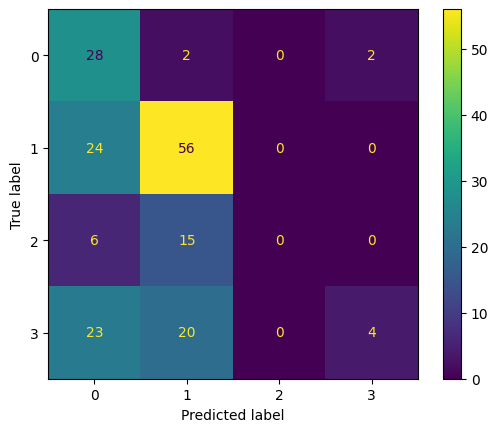

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test.argmax(axis=1), best_model.predict(X_test_scaled2).argmax(axis=1))